# Solutions for mini-project
**Zihan Chen**, zc366, [GitHub Repo: EMNIST-Naive-Bayes](https://github.com/Cesartwothousands/EMNIST-Naive-Bayes)

## 1. Visualizing the EMNIST Dataset
### 1.1. Loading the EMNIST Dataset
I initially relied on the emnist_project.py script to fetch the dataset. However, for this project, I've renamed it to load_dataset.py and pruned unnecessary imports. I will use a balanced version of the dataset, which requires setting the `split` parameter to `balanced`. This version provides \( C = 47 \) distinct classes. Despite the name "balanced," the dataset may not always have a uniform distribution among classes. Therefore, I should still take into account the class distribution \( P(C_k) \) when building subsequent models.

The following table shows the size of each file in the dataset. Then I will implement the visualization of the dataset.

| Filename                                     | Size(KB)      |
|----------------------------------------------|---------------|
| `emnist-balanced-test-images-idx3-ubyte`     | 14,739,216    |
| `emnist-balanced-test-labels-idx1-ubyte`     | 18,808        |
| `emnist-balanced-train-images-idx3-ubyte`    | 88,435,216    |
| `emnist-balanced-train-labels-idx1-ubyte`    | 112,808       |
| `emnist-byclass-test-images-idx3-ubyte`      | 91,197,248    |
| `emnist-byclass-test-labels-idx1-ubyte`      | 116,331       |
| `emnist-byclass-train-images-idx3-ubyte`     | 547,178,704   |
| `emnist-byclass-train-labels-idx1-ubyte`     | 697,940       |
| `emnist-bymerge-test-images-idx3-ubyte`      | 91,197,248    |
| `emnist-bymerge-test-labels-idx1-ubyte`      | 116,331       |
| `emnist-bymerge-train-images-idx3-ubyte`     | 547,178,704   |
| `emnist-bymerge-train-labels-idx1-ubyte`     | 697,940       |
| `emnist-digits-test-images-idx3-ubyte`       | 31,360,016    |
| `emnist-digits-test-labels-idx1-ubyte`       | 40,008        |
| `emnist-digits-train-images-idx3-ubyte`      | 188,160,016   |
| `emnist-digits-train-labels-idx1-ubyte`      | 240,008       |
| `emnist-letters-test-images-idx3-ubyte`      | 16,307,216    |
| `emnist-letters-test-labels-idx1-ubyte`      | 20,808        |
| `emnist-letters-train-images-idx3-ubyte`     | 97,843,216    |
| `emnist-letters-train-labels-idx1-ubyte`     | 124,808       |
| `emnist-mnist-test-images-idx3-ubyte`        | 7,840,016     |
| `emnist-mnist-test-labels-idx1-ubyte`        | 10,008        |
| `emnist-mnist-train-images-idx3-ubyte`       | 47,040,016    |
| `emnist-mnist-train-labels-idx1-ubyte`       | 60,008        |
| **Total**                                    | 1,770,732,638 |

### 1.2. Visualizing the Dataset
I began by establishing a key-value mapping for the multiple EMNIST datasets. Each key, such as 'balanced-test', corresponds to a set of image and label filenames.

The program then converts these IDX files into numpy arrays using the `idx2numpy` library, streamlining data manipulation.

To visualize the data, unique character IDs are identified using `np.unique(labels)`. For each ID, 5 random samples are selected with `np.random.choice`.

Using Matplotlib, a grid is formed with rows equal to the sample count (5) and columns corresponding to unique character IDs.

Each image undergoes two transformations for display: 
1. It's horizontally flipped using `np.fliplr()`.
2. Rotated by 90 degrees with `np.rot90()`.

The character ID serves as the column title, displayed only on the top row.

After fine-tuning the layout with `plt.tight_layout()`, the visual representation of each dataset is saved as a PDF, which can be found attached in the project, the code is shown below and also attached as `dataset_visualization.py` in the project folder.

Visualizing balanced-test...


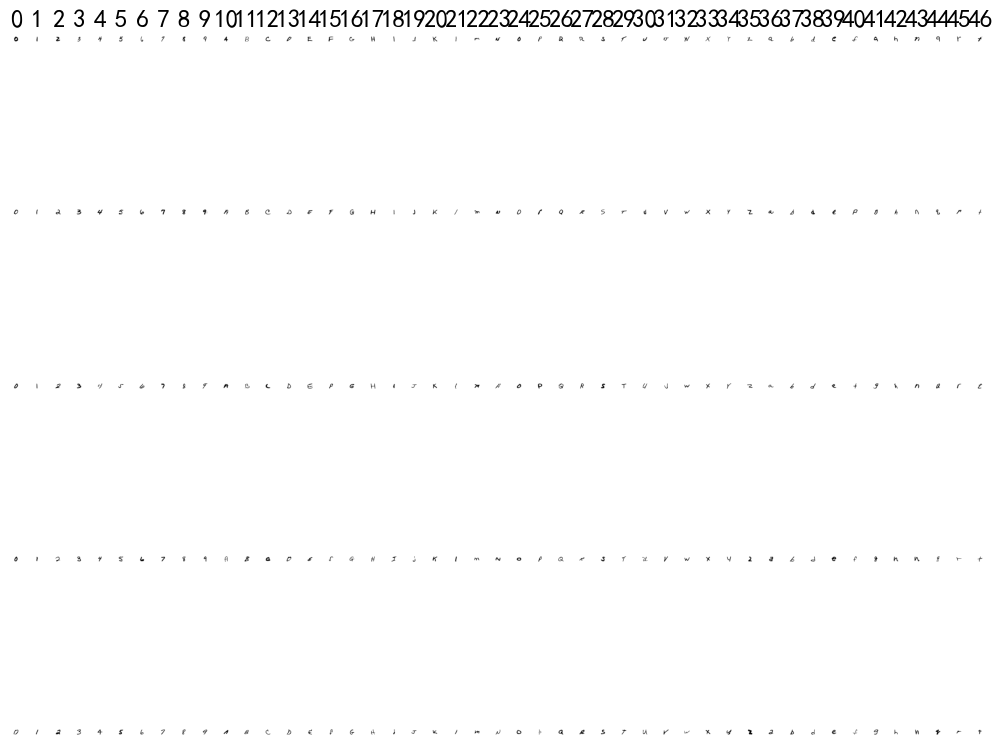

Visualizing balanced-train...


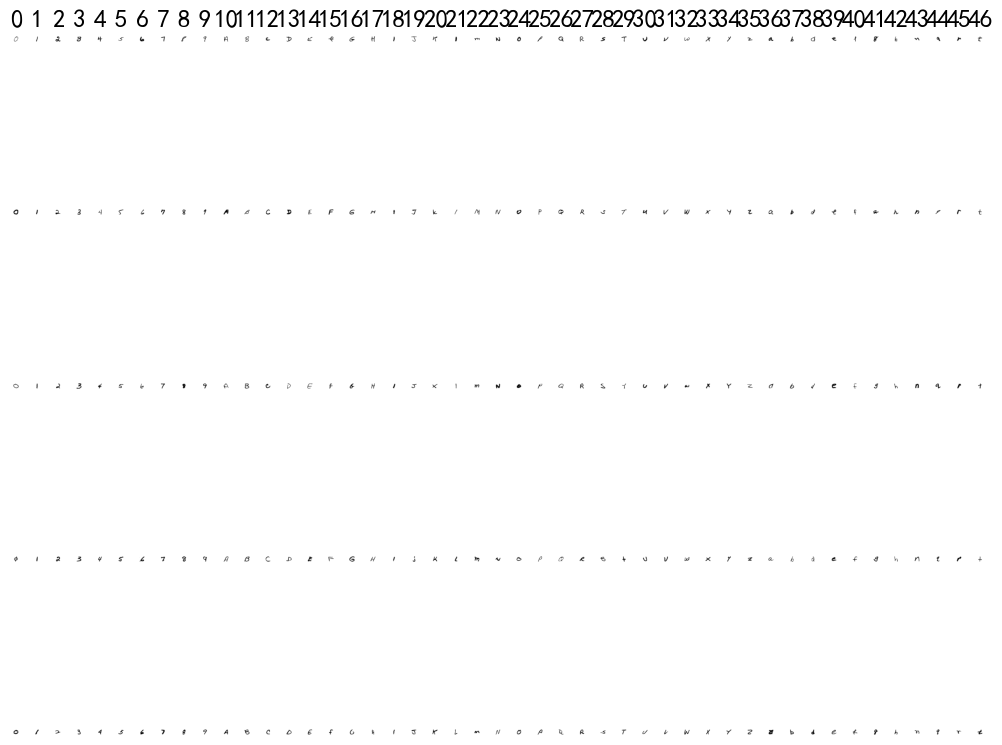

Visualizing byclass-test...


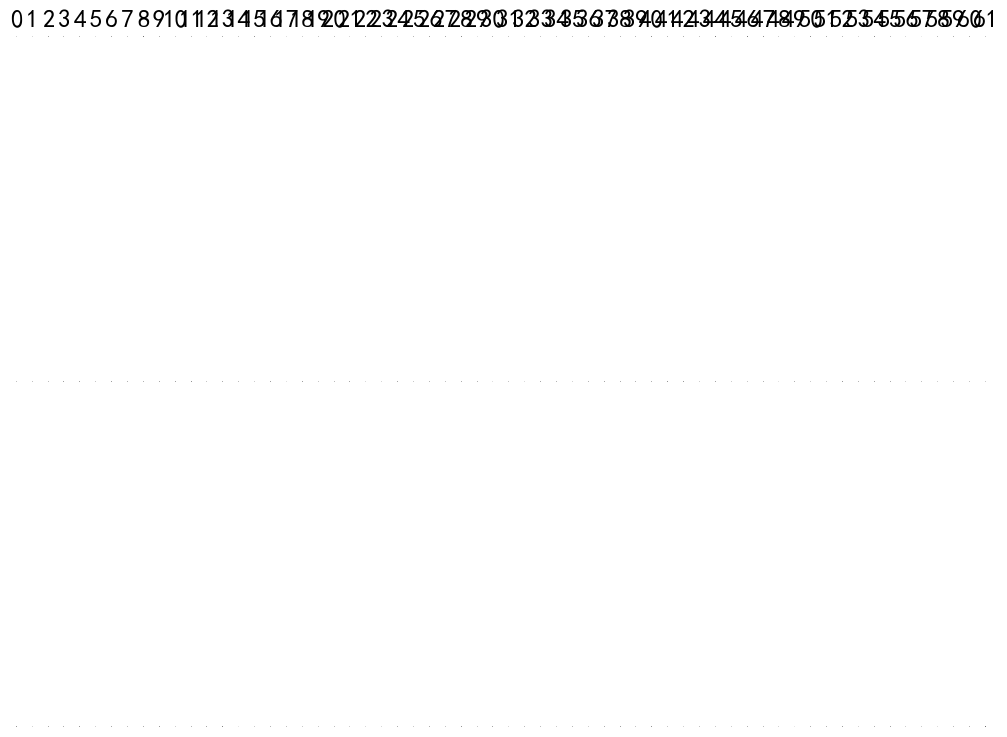

Visualizing byclass-train...


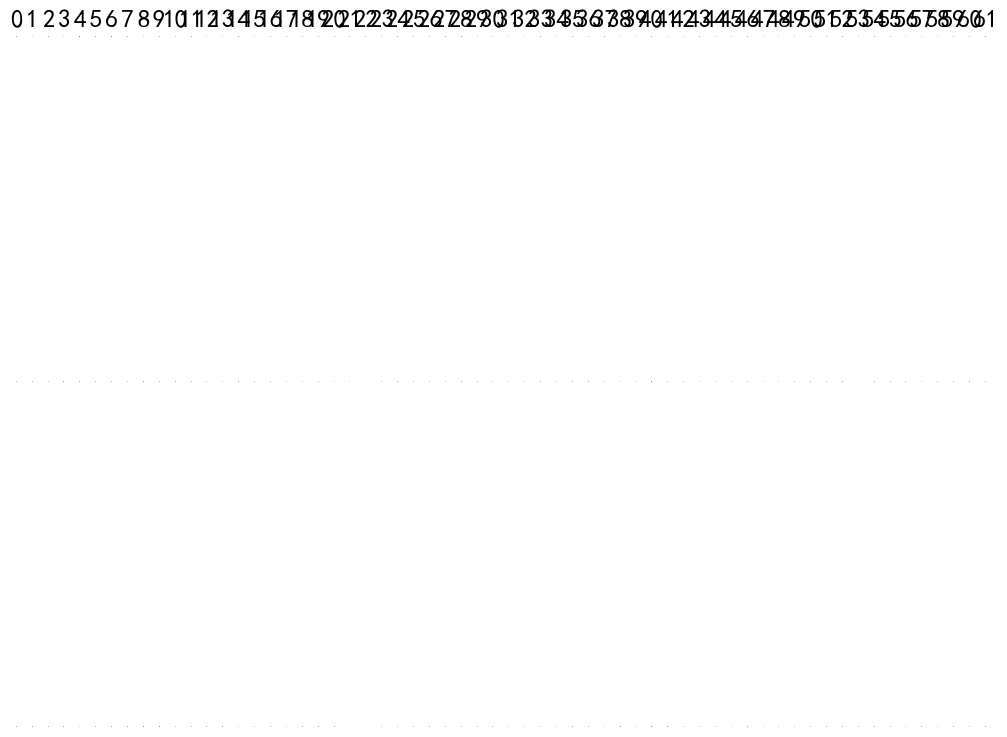

Visualizing bymerge-test...


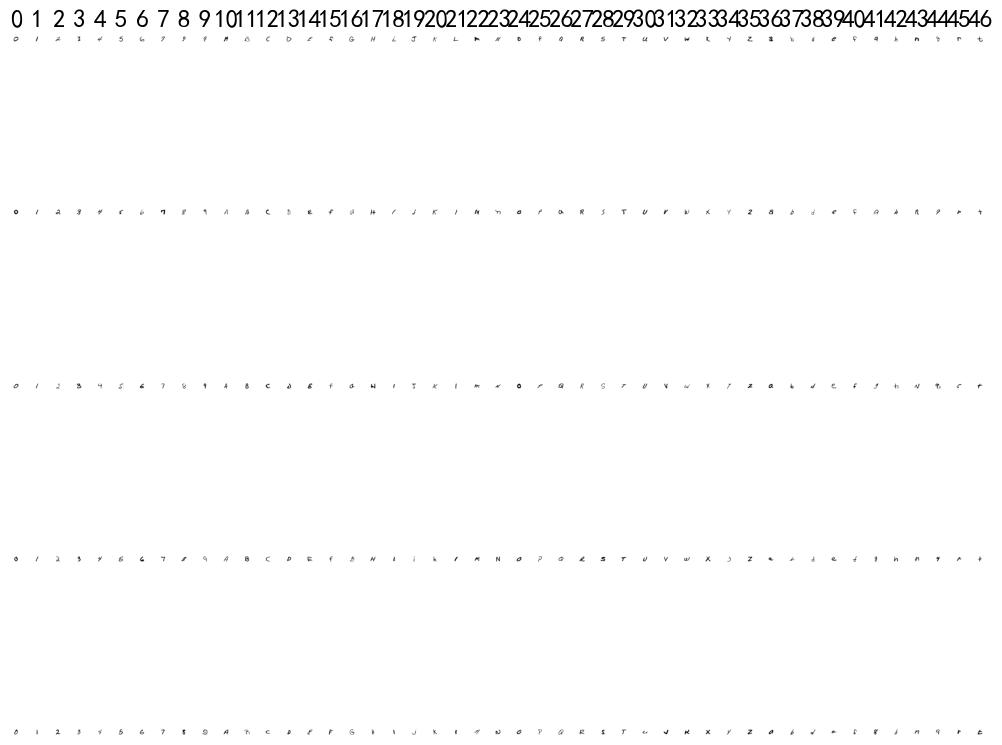

Visualizing bymerge-train...


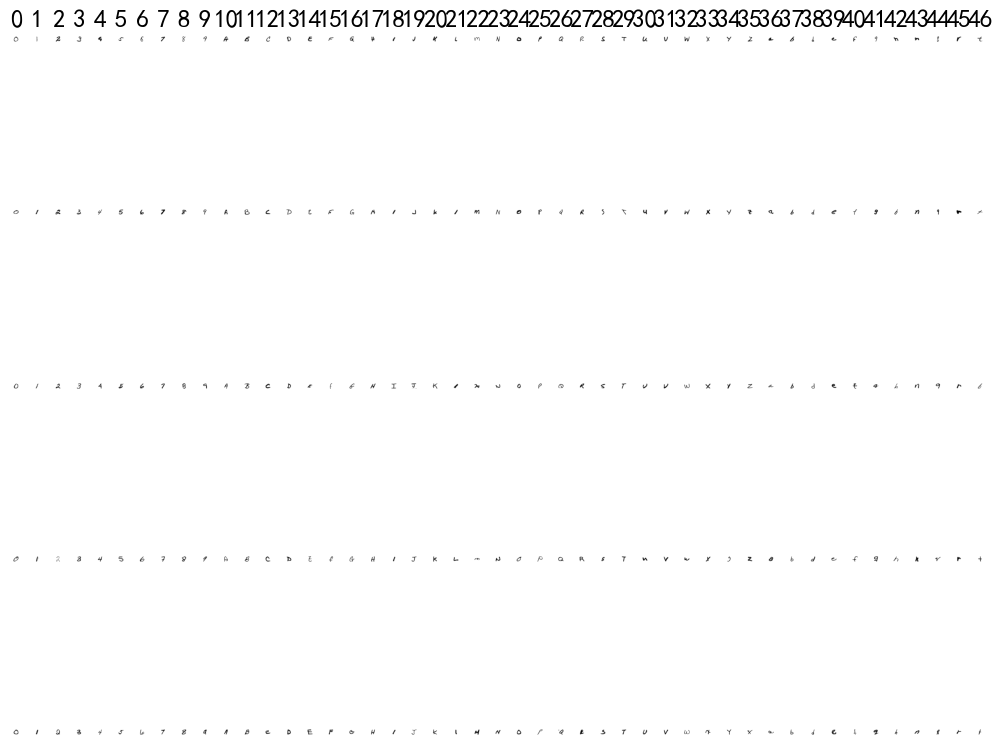

Visualizing digits-test...


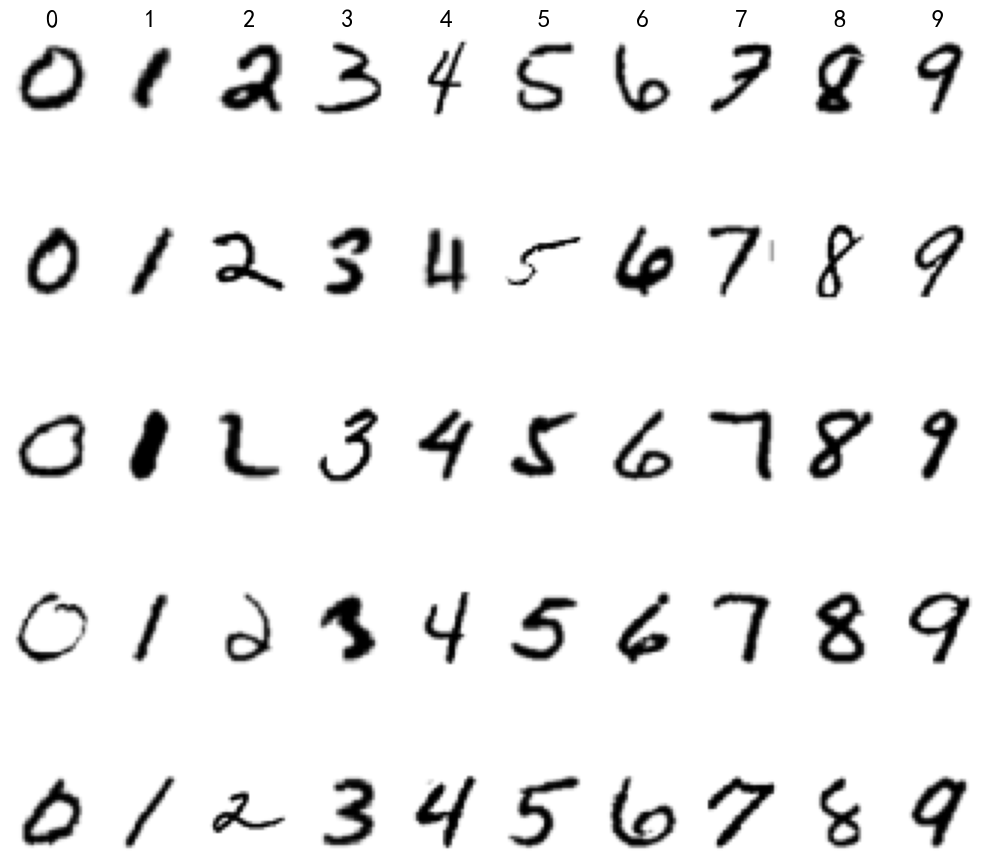

Visualizing digits-train...


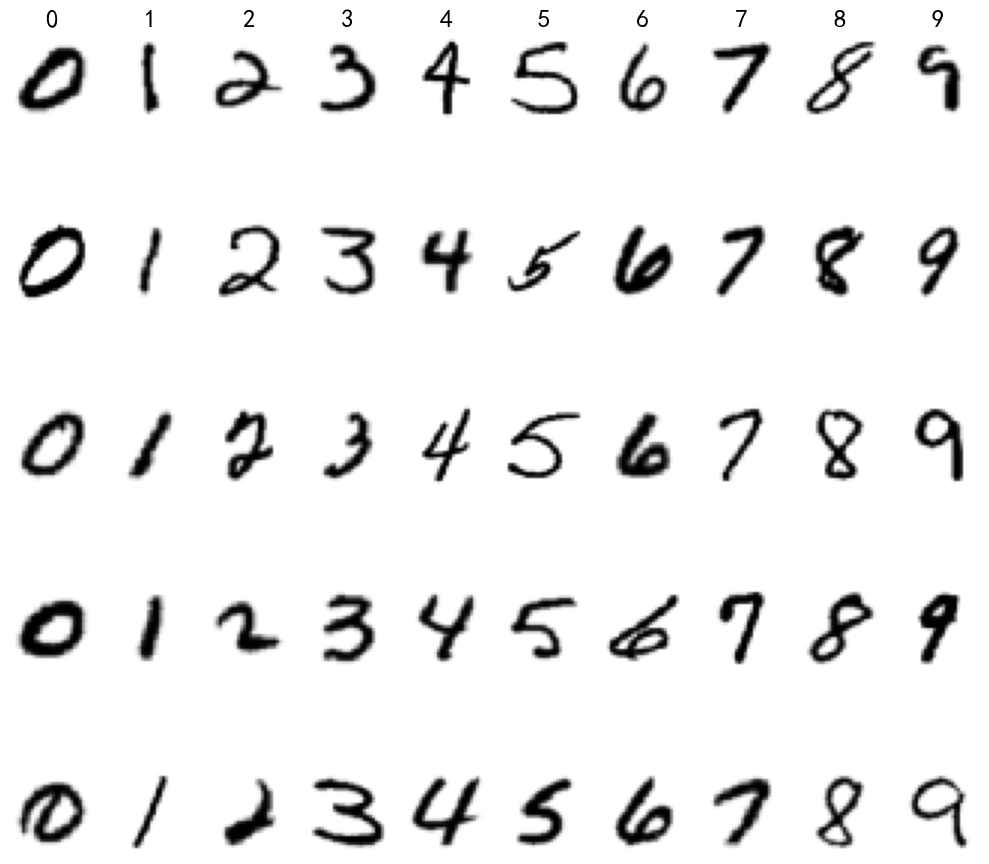

Visualizing letters-test...


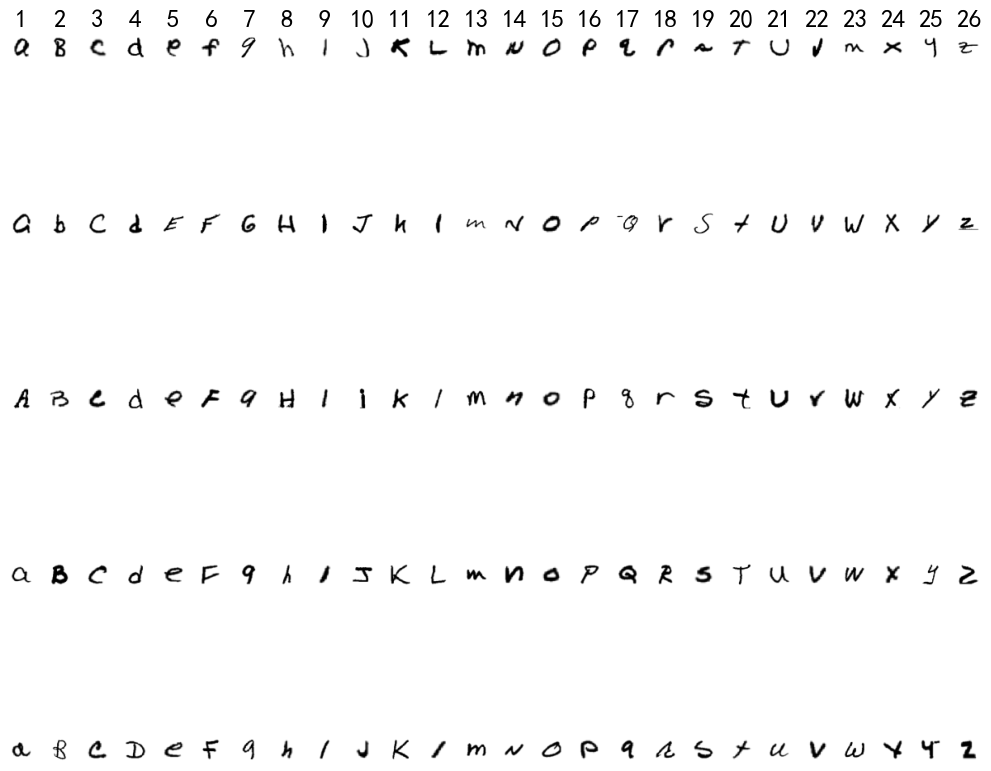

Visualizing letters-train...


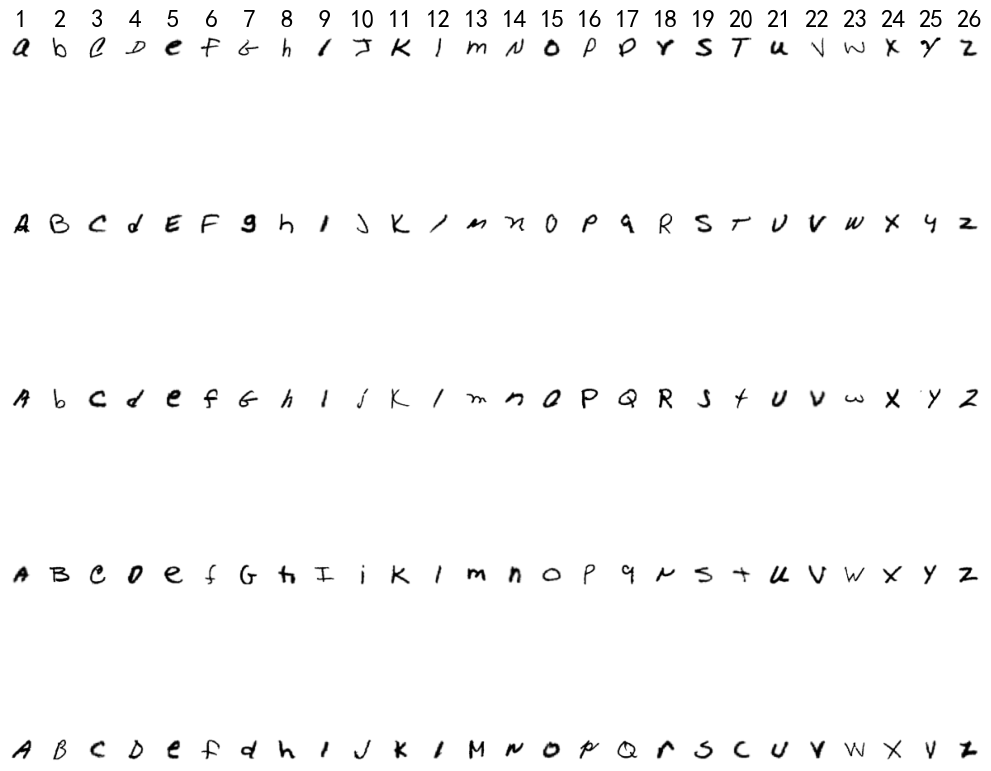

Visualizing mnist-test...


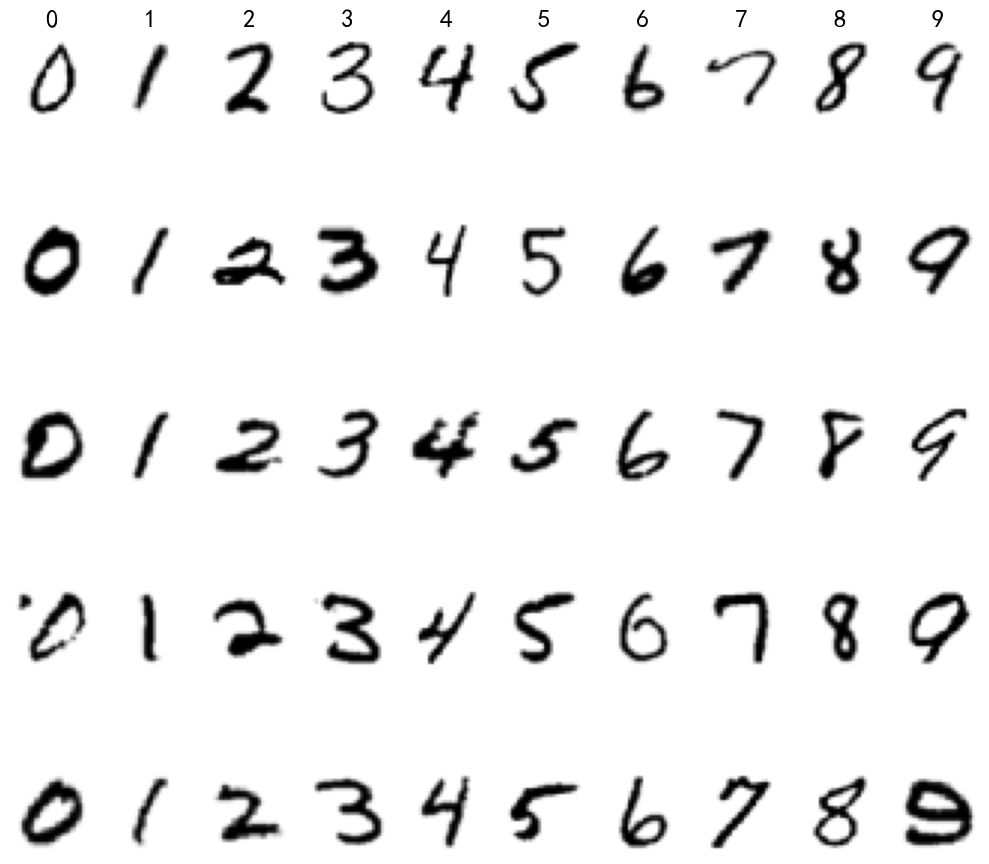

Visualizing mnist-train...


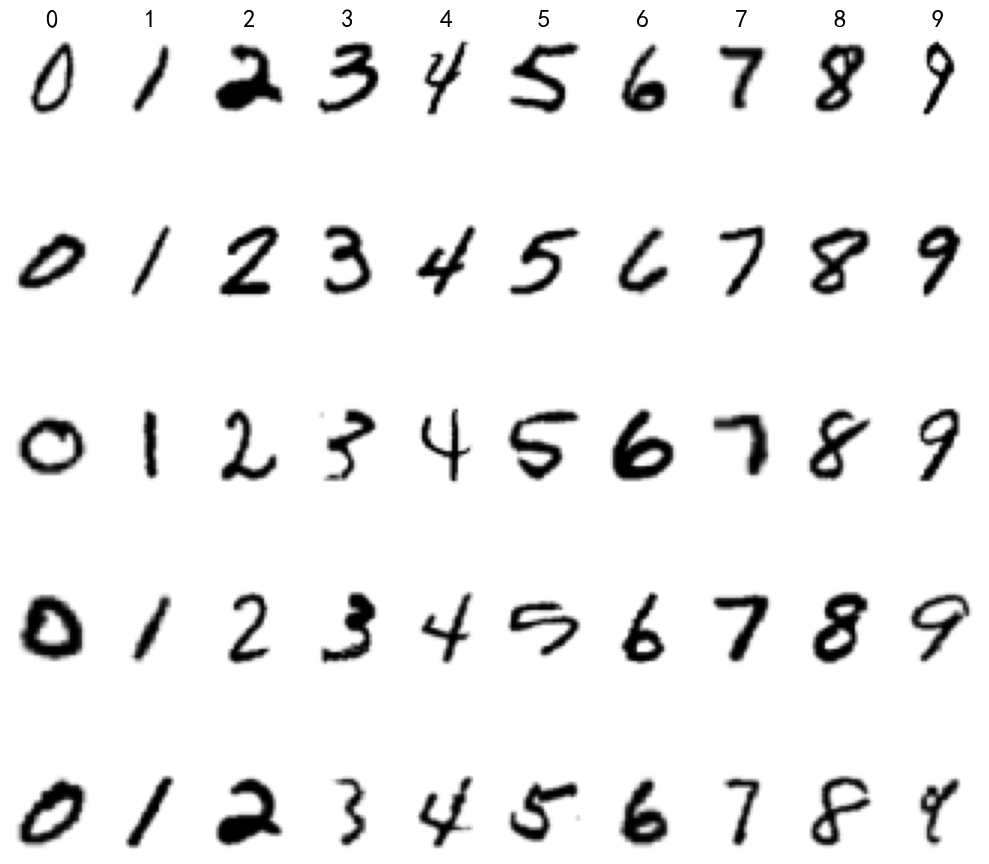

In [15]:
import idx2numpy
import matplotlib.pyplot as plt
import os
import numpy as np

# initialize the data directory
data_dir = r'C:\aCesar\F_File\MSCS\CS535_Machie Learning I\mini-project\EMNIST-Naive-Bayes\dataset\EMNIST\raw'
pdf_output_path = r'C:\aCesar\F_File\MSCS\CS535_Machie Learning I\mini-project\EMNIST-Naive-Bayes\dataset\EMNIST\pdf_output'

# map the file names and their corresponding labels
datasets = {
    'balanced-test':('emnist-balanced-test-images-idx3-ubyte', 'emnist-balanced-test-labels-idx1-ubyte'),
    'balanced-train':('emnist-balanced-train-images-idx3-ubyte', 'emnist-balanced-train-labels-idx1-ubyte'),
    'byclass-test':('emnist-byclass-test-images-idx3-ubyte', 'emnist-byclass-test-labels-idx1-ubyte'),
    'byclass-train':('emnist-byclass-train-images-idx3-ubyte', 'emnist-byclass-train-labels-idx1-ubyte'),
    'bymerge-test':('emnist-bymerge-test-images-idx3-ubyte', 'emnist-bymerge-test-labels-idx1-ubyte'),
    'bymerge-train':('emnist-bymerge-train-images-idx3-ubyte', 'emnist-bymerge-train-labels-idx1-ubyte'),
    'digits-test':('emnist-digits-test-images-idx3-ubyte', 'emnist-digits-test-labels-idx1-ubyte'),
    'digits-train':('emnist-digits-train-images-idx3-ubyte', 'emnist-digits-train-labels-idx1-ubyte'),
    'letters-test':('emnist-letters-test-images-idx3-ubyte', 'emnist-letters-test-labels-idx1-ubyte'),
    'letters-train':('emnist-letters-train-images-idx3-ubyte', 'emnist-letters-train-labels-idx1-ubyte'),
    'mnist-test':('emnist-mnist-test-images-idx3-ubyte', 'emnist-mnist-test-labels-idx1-ubyte'),
    'mnist-train':('emnist-mnist-train-images-idx3-ubyte', 'emnist-mnist-train-labels-idx1-ubyte'),
}

def visualize_dataset(image_file, label_file):
    # Convert the idx files to numpy arrays
    images = idx2numpy.convert_from_file(image_file)
    labels = idx2numpy.convert_from_file(label_file)
    
    # Define the number of samples and character IDs
    num_samples_per_char = 5
    unique_char_ids = np.unique(labels)

    # Initialize the figure for visualization
    figure = plt.figure(figsize=(10, 10))
    cols = len(unique_char_ids)
    rows = num_samples_per_char

    for j, char_id in enumerate(unique_char_ids):
        idxs = np.where(labels == char_id)[0]
        random_idxs = np.random.choice(idxs, num_samples_per_char, replace=False)

        for i in range(num_samples_per_char):
            ax = figure.add_subplot(rows, cols, i*cols + j + 1)
            
            # First, flip the image horizontally and then rotate it by 90 degrees
            img = np.rot90(np.fliplr(images[random_idxs[i]]))
            
            if i == 0:
                ax.set_title(str(char_id), fontsize=18)
            ax.imshow(img, cmap=plt.cm.binary)
            ax.axis("off")

    # Adjust layout and save the visualization as a PDF
    plt.tight_layout()
    plt.savefig(os.path.join(pdf_output_path, f"emnist-{os.path.basename(image_file)}.pdf"), bbox_inches='tight')
    plt.show()

for dataset_name, (img_file, lbl_file) in datasets.items():
    print(f"Visualizing {dataset_name}...")
    img_path = os.path.join(data_dir, img_file)
    lbl_path = os.path.join(data_dir, lbl_file)
    visualize_dataset(img_path, lbl_path)

## 2. Building a Model
In order to build a conditional Categorical Naive Bayes model, I need to assume that all pixels are independent binary RVs. I will use `scikit-learn`'s Estimator object to build the model. 

For priors of the class distribution, I will assume Dirichlet priors with a uniform distribution. This is equivalent to assuming a uniform distribution for the class distribution. 

For priors of each pixel, I will assume Beta priors, which is equivalent to assuming a uniform distribution for each pixel.

### 2.1. Implement two learning paradigms
To implement Maximum Likelihood Estimation (MLE) and Maximum A Posteriori Estimation  (MAP) for the Categorical Naive Bayes, it needs to estimate the probabilities of the features (pixels) for each class.

For Maximum Likelihood Estimation (**MLE**):

$$ 
P(x_i = 1 \mid y = c) = \frac{N_1}{N_1 + N_2}
$$

For Maximum A Posteriori Estimation (**MAP**) with Beta priors for each pixel:

$$ 
P(x_i = 1 \mid y = c) = \frac{N_1 + \alpha - 1}{N_1 + N_2 + \alpha + \beta - 2}
$$

### 2.2. Implement predictive models based on each type of learning
Given the learned parameters, I'll compute the posterior probabilities for each class given a new data point and predict the class with the highest probability.

### 2.3. Implement the scoring methods for the two models
Implement the scoring methods for the two models as Estimate Score/Model method.
$$
\text{Score}_{MLE} = \frac{1}{|D|} \log p(D | \Theta_{MLE})
$$

$$
\text{Score}_{MAP} = \frac{1}{|D|} \log p(D | \Theta_{MAP})
$$


In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from models.load_data import load_data
import warnings


warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", UserWarning)
class CategoricalNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=1, beta=1, method="MLE"):
        self.alpha = alpha  # hyperparameter for MAP estimation of class probabilities
        self.beta = beta  # hyperparameter for MAP estimation of pixel probabilities
        self.method = method  # Estimation method: "MLE" or "MAP"

        # Initialization of class related attributes
        self.classes_ = None  # A list of unique classes in the dataset
        self.class_probs_ = None  # List containing probabilities of each class
        self.pixel_probs_ = None  # Dictionary with classes as keys and pixel probabilities as values

        # Internal variable to store probabilities from the latest prediction
        self._latest_probs = None

    # Task 1: Build a Fit Method using MLE and MAP for model parameters
    def fit(self, X, y):
        self.classes_ = np.unique(y)

        class_counts = np.array([np.sum(y == c) for c in self.classes_])
        total_samples = len(y)

        # Estimate class probabilities
        if self.method == "MLE":
            self.class_probs_ = [np.mean(y == c) for c in self.classes_]
        elif self.method == "MAP":
            self.class_probs_ = [(np.sum(y == c) + self.alpha - 1) /
                                 (total_samples + len(self.classes_) * self.alpha)
                                 for c in self.classes_]
        else:
            raise ValueError("Invalid method. Use either 'MLE' or 'MAP'.")

        # Estimate pixel probabilities
        if self.method == "MLE":
            self.pixel_probs_ = {c: np.mean(X[y == c], axis=0) for c in self.classes_}
        elif self.method == "MAP":
            self.pixel_probs_ = {c: (np.sum(X[y == c], axis=0) + self.beta - 1) /
                                    (np.sum(y == c) + 2 * self.beta - 2)
                                 for c in self.classes_}

    # Task 2: Build a Predict Method using MLE and MAP for model parameters
    def predict(self, X):
        epsilon = 1e-10  # Small constant to prevent division by zero
        min_prob = 1e-200  # Threshold to prevent very small probability product
        all_probs = []

        for x in X:
            probs = []
            for c in self.classes_:
                prob = self.class_probs_[self.classes_.tolist().index(c)]
                for idx, pixel in enumerate(x):
                    prob *= self.pixel_probs_[c][idx] * pixel + (1 - self.pixel_probs_[c][idx]) * (1 - pixel)
                    prob = max(prob, min_prob)  # Ensure the probability does not get too small
                probs.append(prob)

            probs_sum = sum(probs)
            if probs_sum <= epsilon:  # Avoid division by zero or a very small number
                probs_sum += epsilon
            normalized_probs = [p / probs_sum for p in probs]
            all_probs.append(normalized_probs)

        self._latest_probs = all_probs
        return [self.classes_[np.argmax(probs)] for probs in all_probs]

    # Task 3: Build a Score Method using MLE and MAP for model parameters
    def score(self, X, y):
        # Make predictions to get the latest probabilities
        self.predict(X)

        # Compute the average log likelihood of the data
        log_likelihoods = [np.log(max(prob)) for prob in self._latest_probs]
        avg_log_likelihood = np.mean(log_likelihoods)

        return avg_log_likelihood

Then, I will use a load_data function to load the dataset which is already download in the disk and use some simple sample subset to test the model.

In [11]:
import idx2numpy
import os


def load_data(dataset_type='balanced', data_type='train'):
    # Define the file paths based on dataset_type and data_type
    images_file = f"C:\\aCesar\\F_File\\MSCS\\CS535_Machie Learning I\\mini-project\\data\\EMNIST\\raw\\emnist-{dataset_type}-{data_type}-images-idx3-ubyte"
    labels_file = f"C:\\aCesar\\F_File\\MSCS\\CS535_Machie Learning I\\mini-project\\data\\EMNIST\\raw\\emnist-{dataset_type}-{data_type}-labels-idx1-ubyte"

    # Ensure files exist
    if not os.path.exists(images_file) or not os.path.exists(labels_file):
        raise ValueError(f"Files related to {dataset_type} and {data_type} not found!")

    # Convert idx files to numpy arrays
    X = idx2numpy.convert_from_file(images_file)
    y = idx2numpy.convert_from_file(labels_file)
    X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
    # print(X.shape, y.shape)

    return X, y

In [12]:
# To load 'balanced' data:
X_train, y_train = load_data('balanced', 'train')
X_test, y_test = load_data('balanced', 'test')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Initialize the Naive Bayes Classifier
clf_mle = CategoricalNaiveBayes(method="MLE")
clf_map = CategoricalNaiveBayes(method="MAP")

# Fit the model
clf_mle.fit(X_train, y_train)
clf_map.fit(X_train, y_train)

# Predict and score on a subset of the data for testing
for n_samples in [10, 100, 250]:
    X_subset = X_test[:n_samples]
    y_subset = y_test[:n_samples]
    # print(f"Subset {X_subset}")
    # print(f"Subset {y_subset}")
    predictions_mle = clf_mle.predict(X_subset)
    predictions_map = clf_map.predict(X_subset)
    score_mle = clf_mle.score(X_subset, y_subset)
    score_map = clf_map.score(X_subset, y_subset)

    # print(f"Sample of subset: {y_subset}")
    # print(f"Predictions of subset: {predictions_mle}")
    print(f"Score for MLE {n_samples} samples: {score_mle:.4f}")
    print(f"Score for MAP {n_samples} samples: {score_map:.4f}")

(112800, 784) (112800,) (18800, 784) (18800,)
Score for MLE 10 samples: -435.0358
Score for MAP 10 samples: -435.0358
Score for MLE 100 samples: -431.7698
Score for MAP 100 samples: -431.7698
Score for MLE 250 samples: -433.3152
Score for MAP 250 samples: -433.3152


## 3. Learning Curves for Balanced Training Dataset

The `plot_learning_curve` function visualizes the performance of a categorical Naive Bayes model across varying training sizes.

**Plot Function Overview**:

- **Parameters**:
  1. `method`: Estimation type - "MAP" or "MLE".
  2. `alpha` & `beta`: Model-specific parameters.
  3. `X_train` & `y_train`: Training data and labels.

- **Workflow**:
  1. Initializes the Naive Bayes model.
  2. Plots learning curves using the `LearningCurveDisplay.from_estimator`.
  3. Displays the customized plot.

Using 11280 samples, this function will visualize performance at 10%, 20%, 40%, 60%, 80%, and 100% of the data. Load your data via `emnist_project.py` and then call this function to see the learning curves for your models.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay
from sklearn.metrics import log_loss
import torch
import torchvision
from sklearn.model_selection import train_test_split
from torchvision import datasets
from sklearn.base import BaseEstimator

In [3]:
data_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])

def get_data(data, indices=None, binarize=True):
    N = len(data)
    if indices is None:
        indices = range(0, N)
    # X = torch.stack([data[i][0] for i in indices], dim=1).squeeze(0) # (N,28,28)
    X = np.stack([data[i][0].numpy() for i in indices], axis=1).squeeze(0)  # (N,28,28)
    if binarize: X = (X > 0.5)
    # y = torch.tensor([data[i][1] for i in indices])
    y = np.array([data[i][1] for i in indices])
    return X, y

data = datasets.EMNIST(
    root="~/data",
    split="balanced",
    download=True,
    transform=data_transform
)

X, y = get_data(data)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.90, random_state=0)

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

print("Size")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Size
(11280, 784) (11280,)
(101520, 784) (101520,)


In [4]:
def plot_learning_curve(method, alpha, beta, X_train, y_train):
    """
    Function to plot learning curve for a given method, alpha, and beta values.

    Parameters:
    - method: Estimation method, either "MAP" or "MLE"
    - alpha: Scalar value for alpha
    - beta: Scalar value for beta
    - X_train: Training data
    - y_train: Training labels
    """

    # Initialize the model for the given alpha and beta
    model = CategoricalNaiveBayes(alpha=alpha, beta=beta, method=method)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_prop_cycle('color', ['b', 'r'])  # Set color cycle to blue for training and red for testing

    common_params = {
        "X": X_train,
        "y": y_train,
        "train_sizes": np.linspace(0.1, 1.0, 5),
        "score_type": "both",
        "n_jobs": 8,
        "line_kw": {"marker": "o"},
        "std_display_style": "fill_between",
        "score_name": "Score",
    }
    
    # Plot learning curve for the model
    LearningCurveDisplay.from_estimator(model, **common_params, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Method: {method}, Alpha: {alpha}, Beta: {beta}", fontweight='bold')
    ax.set_xlabel('Training Size', fontweight='bold')
    ax.set_ylabel('Score', fontweight='bold')
    ax.grid(True)

    plt.tight_layout()
    plt.show()

In [5]:
print("Size of training data: ", X_train.shape)
print("Size of label data: ", y_train.shape)    

Size of training data:  (11280, 784)
Size of label data:  (11280,)


### 3.1. Use MLE method in this balanced dataset

Learning curve for MLE


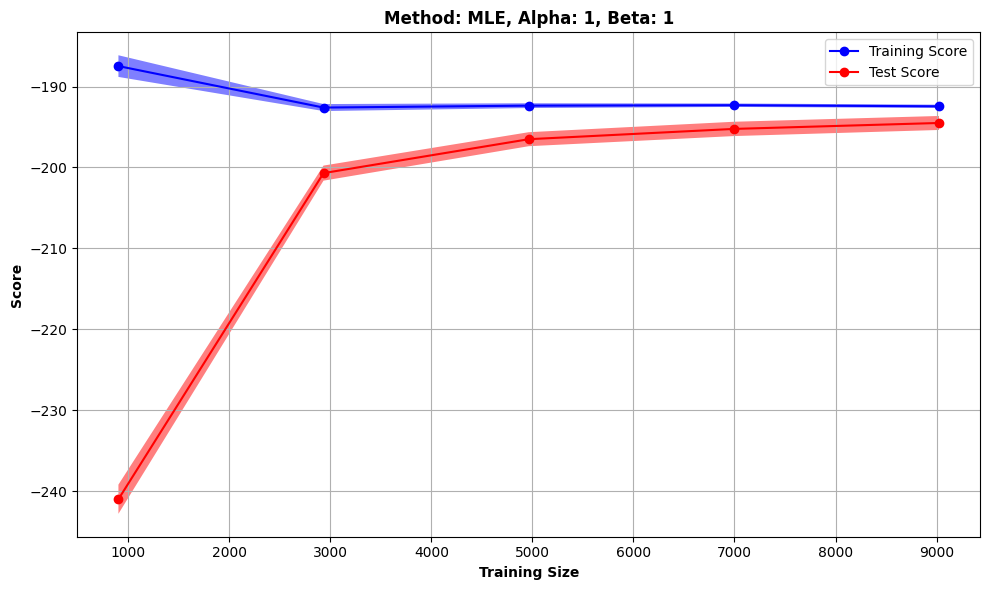

In [13]:
print("Learning curve for MLE")
plot_learning_curve("MLE", 1, 1, X_train, y_train)

### 3.2. Fix the pixel prior Beta = 1
Use MAP method first and set alpha from 1 to 200, and beta = 1.

Learning curve for MAP and alpha=1, beta=1


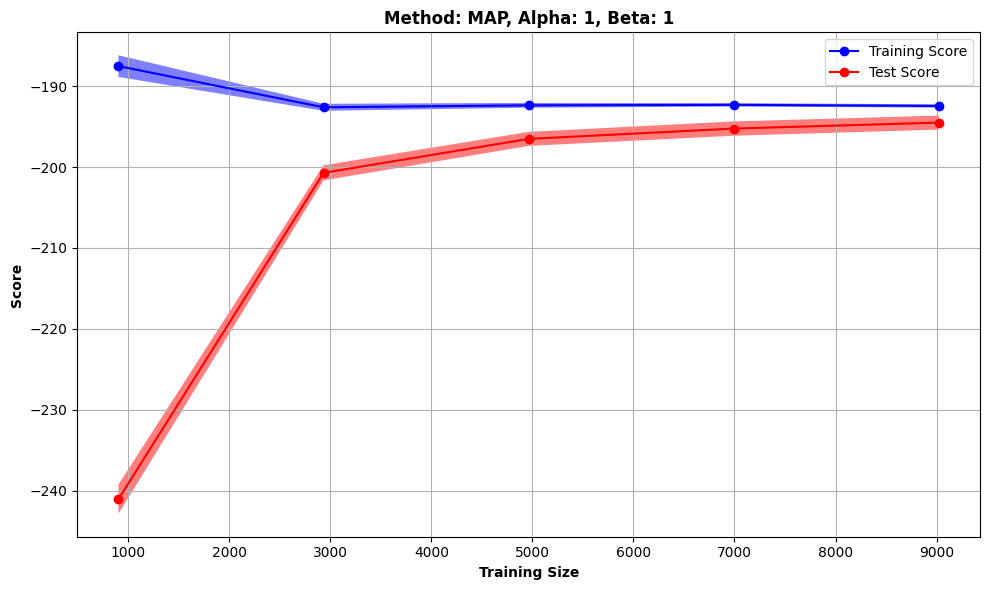

In [6]:
print("Learning curve for MAP and alpha=1, beta=1")
plot_learning_curve("MAP", 1, 1, X_train, y_train)

Learning curve for MAP and alpha=10, beta=1


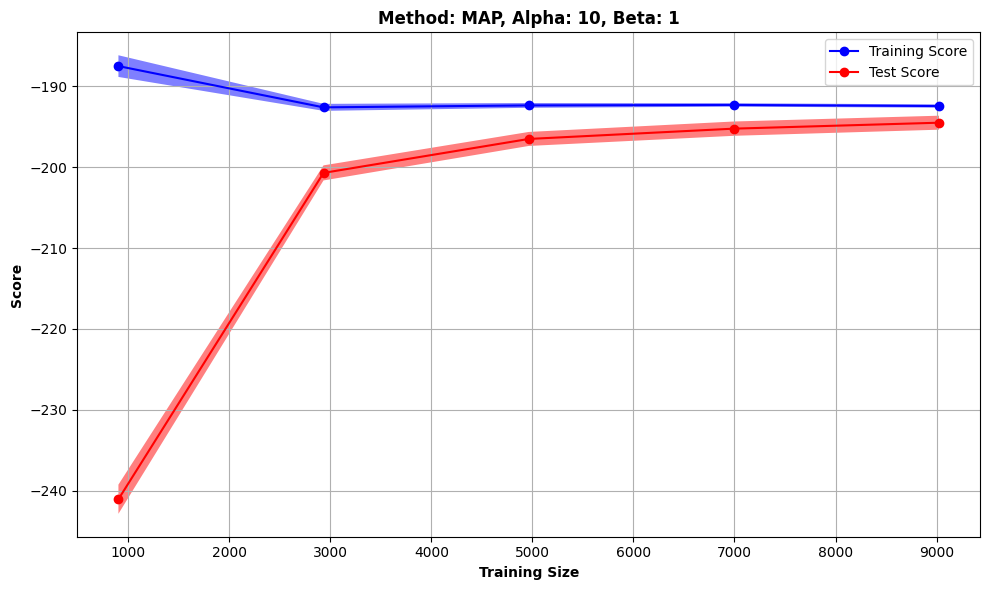

Learning curve for MAP and alpha=50, beta=1


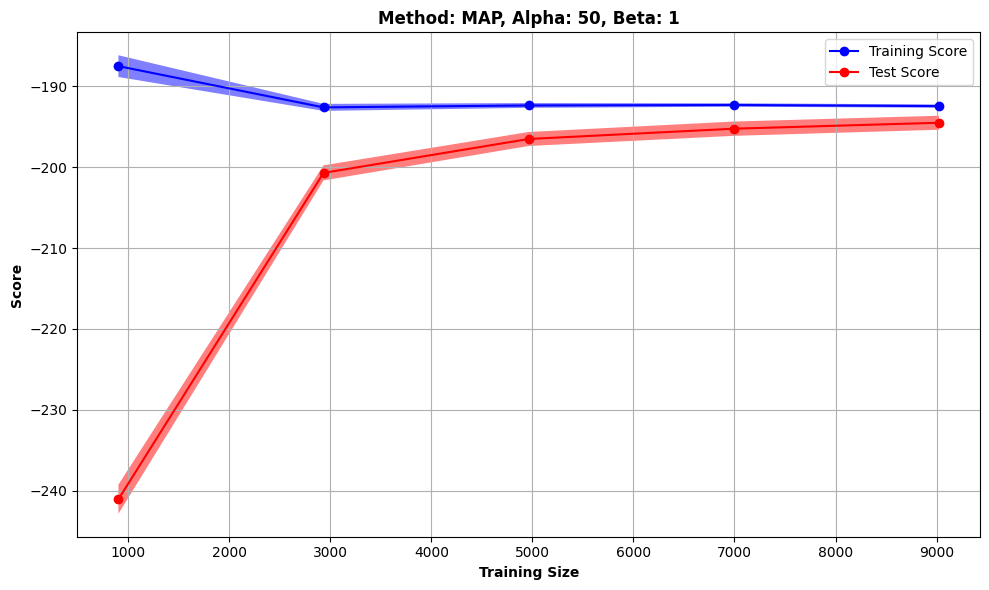

In [7]:
print("Learning curve for MAP and alpha=10, beta=1")
plot_learning_curve("MAP", 10, 1, X_train, y_train)

print("Learning curve for MAP and alpha=50, beta=1")
plot_learning_curve("MAP", 50, 1, X_train, y_train)

Learning curve for MAP and alpha=100, beta=1


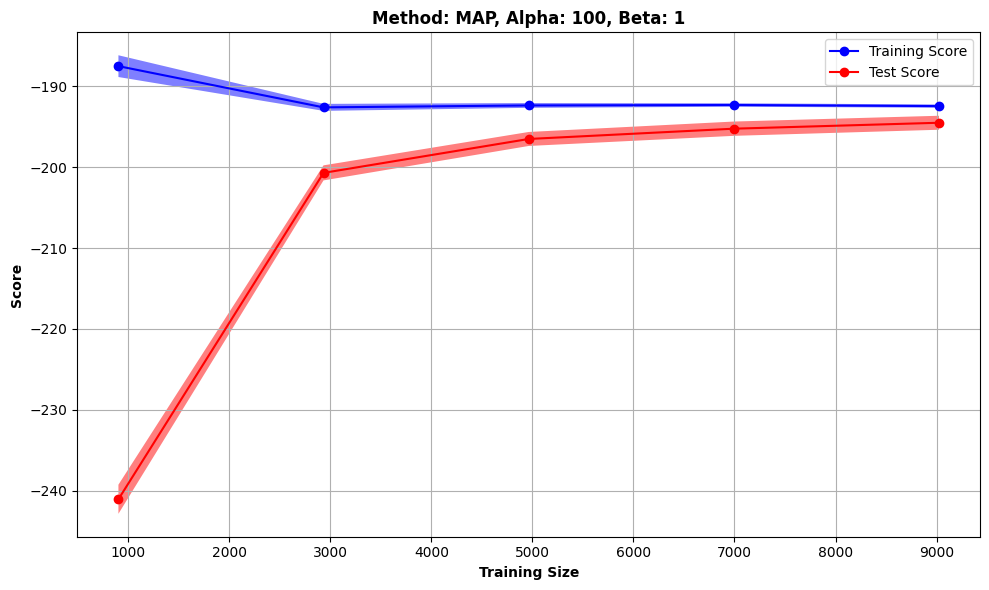

In [10]:
print("Learning curve for MAP and alpha=100, beta=1")
plot_learning_curve("MAP", 100, 1, X_train, y_train)

Learning curve for MAP and alpha=200, beta=1


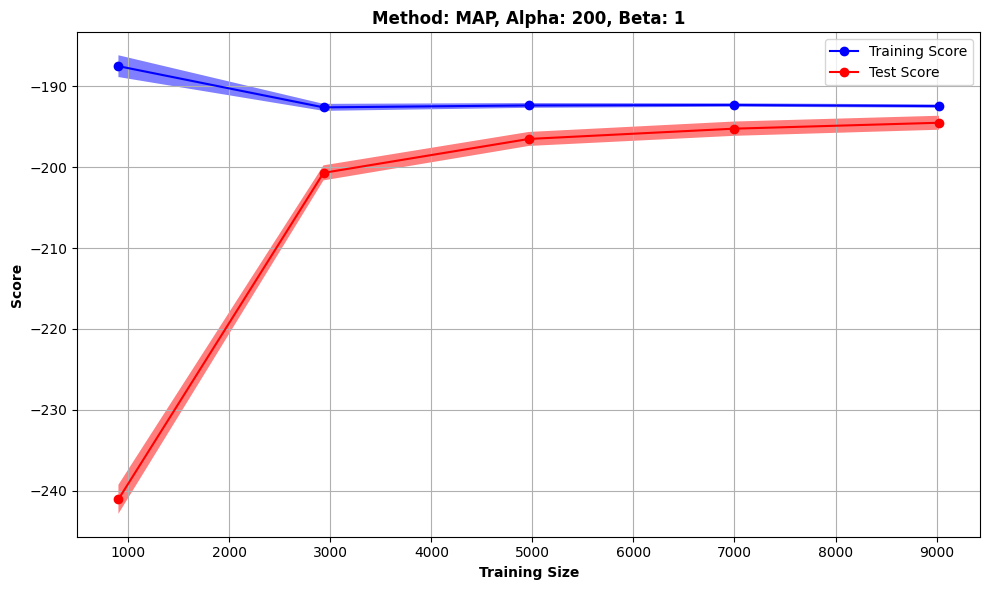

In [11]:
print("Learning curve for MAP and alpha=200, beta=1")
plot_learning_curve("MAP", 200, 1, X_train, y_train)

### 3.3. Fix the class prior Alpha = 1
Use MAP method first and set beta from 1 to 100, and alpha = 1.
I will ignore the alpha = 1, beta = 1 case since it is the same as the previous case.

Learning curve for MAP and alpha=1, beta=2


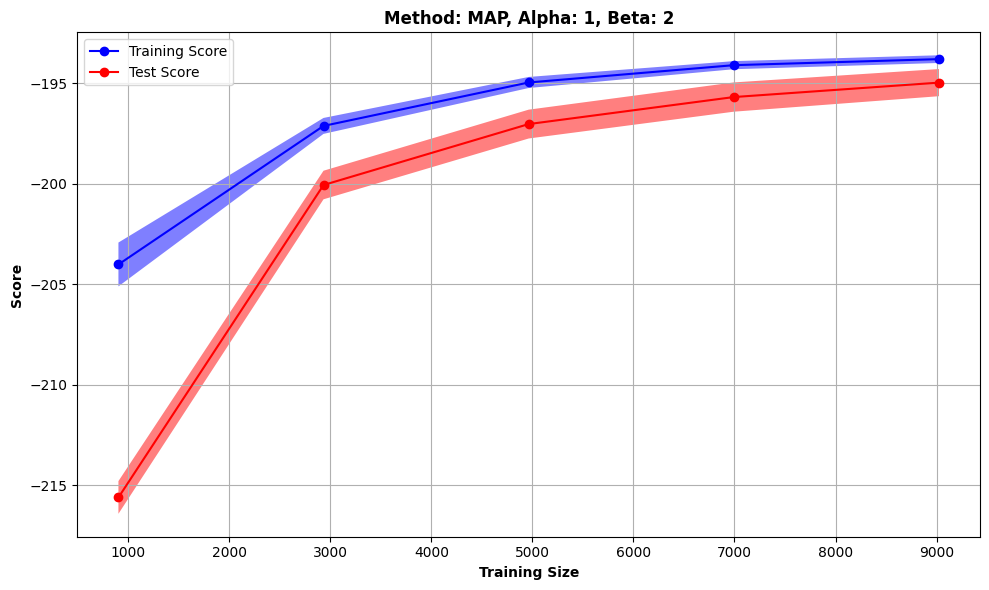

In [10]:
print("Learning curve for MAP and alpha=1, beta=2")
plot_learning_curve("MAP", 1, 2, X_train, y_train)

Learning curve for MAP and alpha=1, beta=10


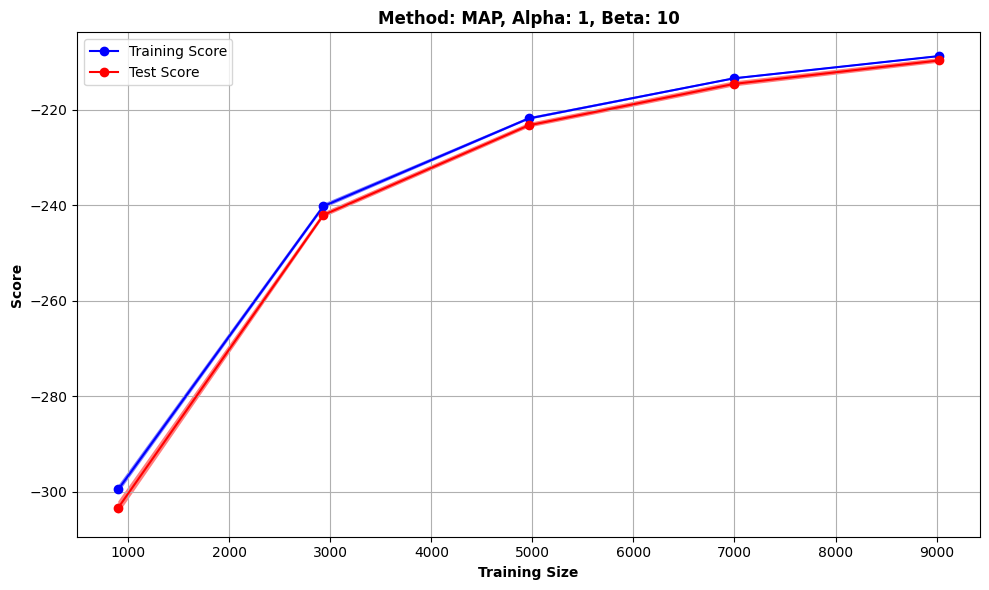

In [11]:
print("Learning curve for MAP and alpha=1, beta=10")
plot_learning_curve("MAP", 1, 10, X_train, y_train)

Learning curve for MAP and alpha=1, beta=100


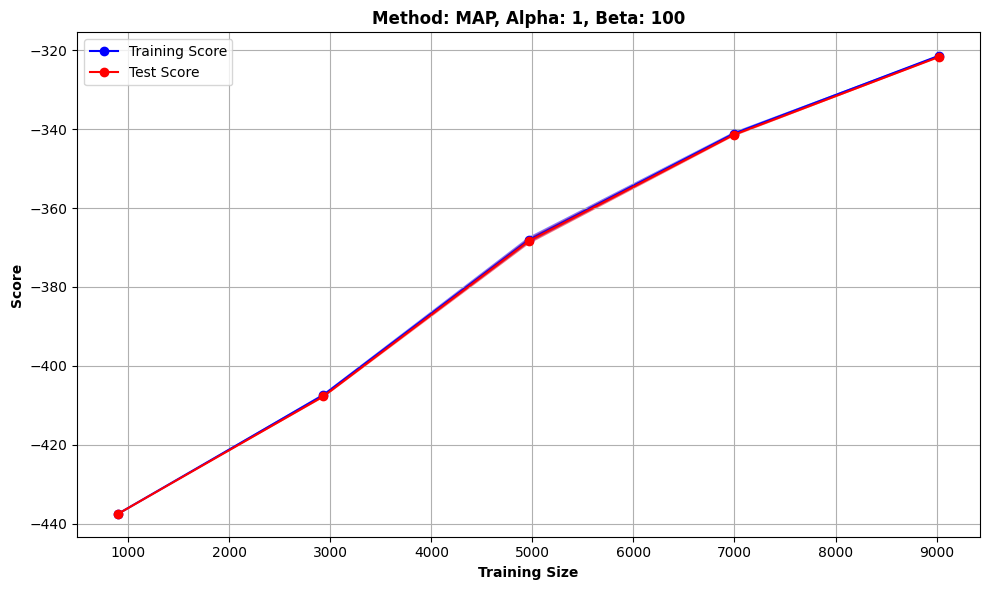

In [12]:
print("Learning curve for MAP and alpha=1, beta=100")
plot_learning_curve("MAP", 1, 100, X_train, y_train)

## 4. Learning Curves for Imbalanced Training Dataset
Datasets often exhibit class imbalances, where certain classes may be underrepresented or even absent.

To mitigate this imbalance, I will adjust the alpha_class parameter to minimize the disparity to the greatest extent possible.

In [6]:
def create_imbalanced_dataset(X_train, y_train, alpha_class):
    # Convert inputs to numpy arrays
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    
    # Make sure X_train and y_train have the same length
    assert len(X_train) == len(y_train)

    # Find unique classes and their counts
    unique_classes, class_counts = np.unique(y_train, return_counts=True)
    
    # Sample from Dirichlet distribution
    class_ratios = np.random.dirichlet([alpha_class] * len(unique_classes))
    
    # Compute the number of samples for each class in the imbalanced dataset
    num_samples_per_class = (class_ratios * len(y_train)).astype(int)
    
    # Ensure at least one sample for each class
    num_samples_per_class = np.maximum(num_samples_per_class, 1)
    
    # Ensure that we don't request more samples than available for each class
    num_samples_per_class = np.minimum(num_samples_per_class, class_counts)
    
    # For each class, select the respective number of samples
    X_list = []
    y_list = []
    for class_label, num_samples in zip(unique_classes, num_samples_per_class):
        # Get indices of all samples of this class
        indices = np.where(y_train == class_label)[0]
        
        # Randomly choose a subset of samples for this class
        chosen_indices = np.random.choice(indices, num_samples, replace=True)
        
        X_list.append(X_train[chosen_indices])
        y_list.append(y_train[chosen_indices])
    
    X_imbalanced = np.concatenate(X_list, axis=0)
    y_imbalanced = np.concatenate(y_list, axis=0)
    
    return X_imbalanced, y_imbalanced

### 4.1. MLE method for imbalanced dataset
Set the alpha_class from 0.1 to 100.

In [7]:
alpha_class = [0.1, 0.2, 0.5, 1, 10, 100]

Learning curve for MLE and alpha_class= 0.1


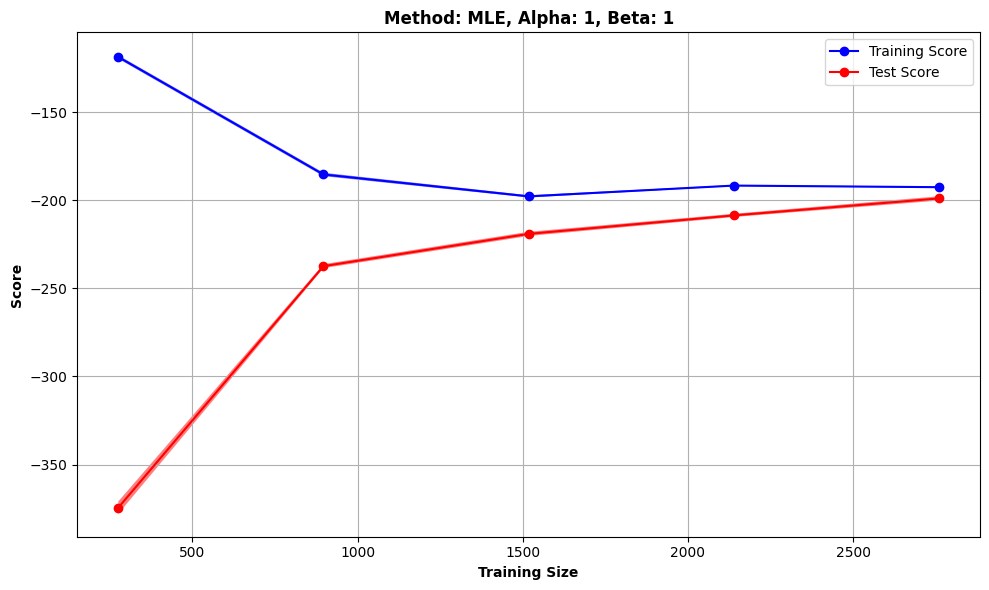

Learning curve for MLE and alpha_class= 0.2


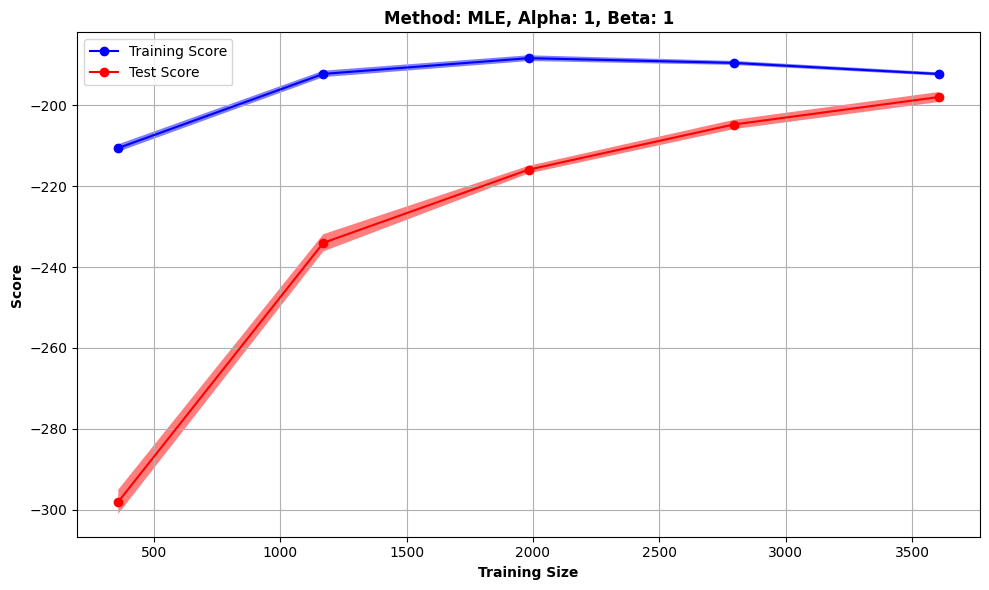

Learning curve for MLE and alpha_class= 0.5


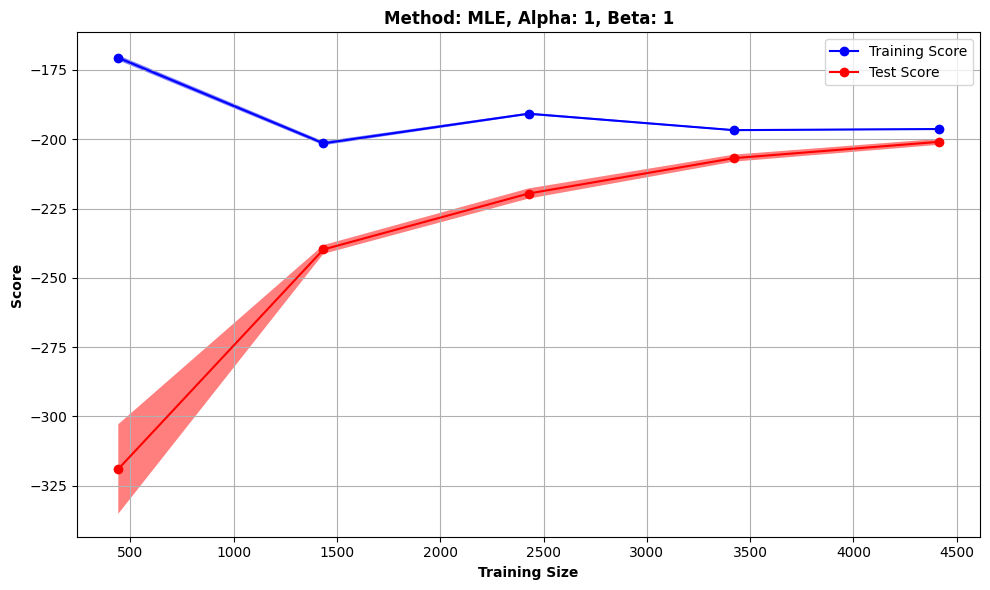

Learning curve for MLE and alpha_class= 1


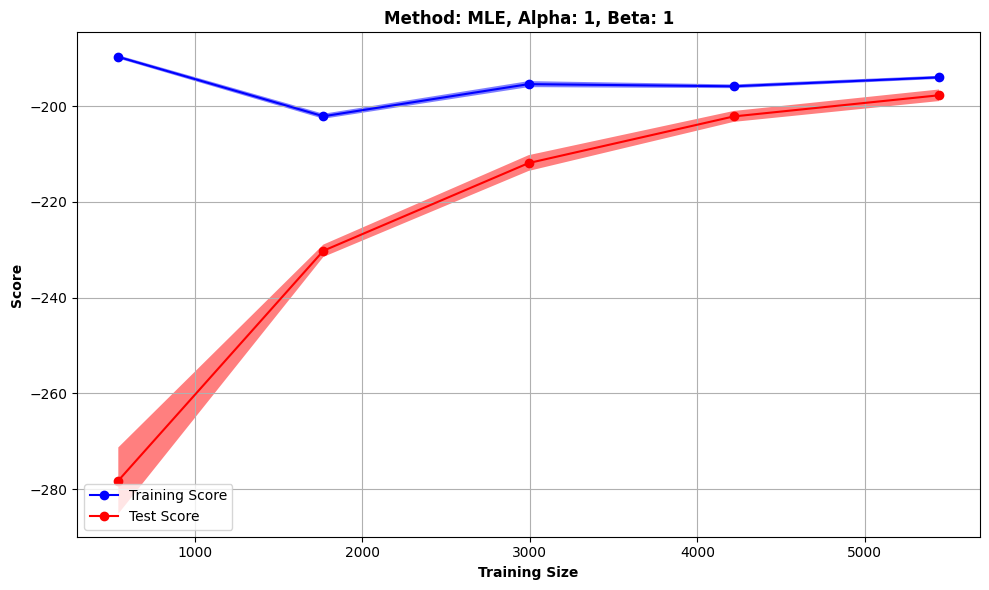

Learning curve for MLE and alpha_class= 10


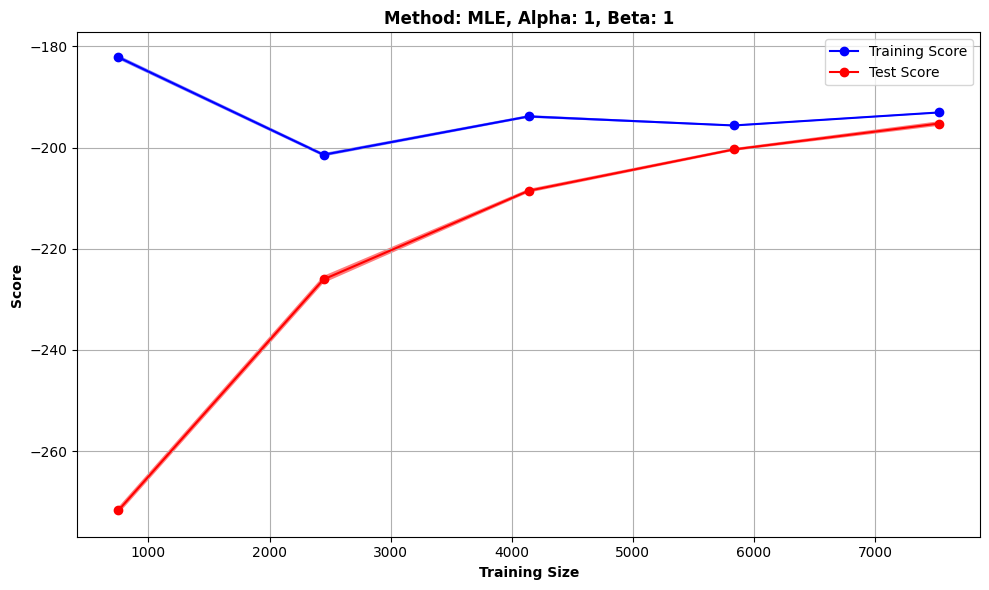

Learning curve for MLE and alpha_class= 100


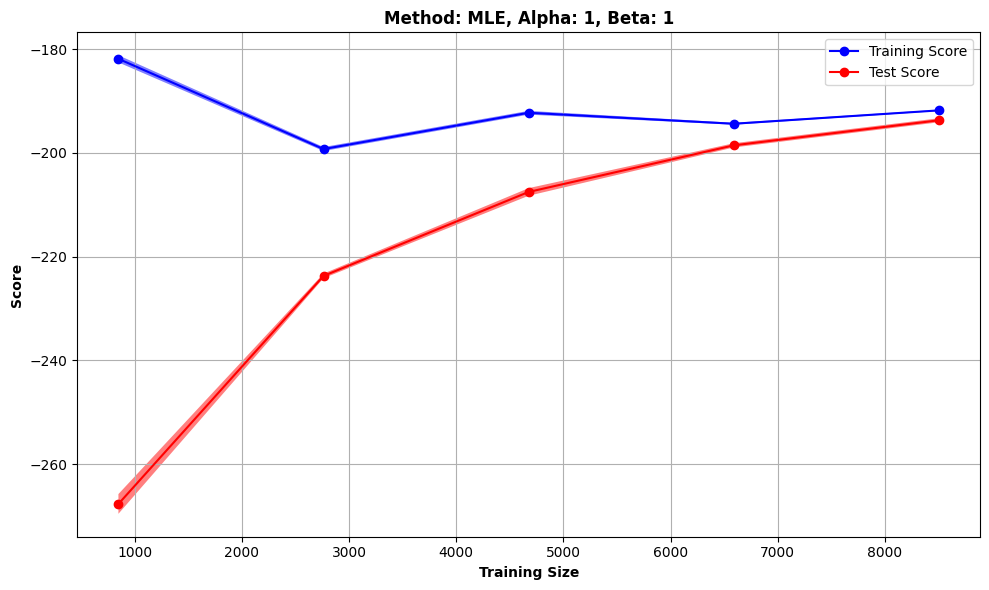

In [10]:
for one_alpha_class in alpha_class:

    X_imbalanced, y_imbalanced = create_imbalanced_dataset(X_train, y_train, one_alpha_class)
    
    print("Learning curve for MLE and alpha_class=", one_alpha_class)
    try:
        plot_learning_curve("MLE", 1, 1, X_imbalanced, y_imbalanced)
    except Exception as e:
        # Print the reason for the exception but do not display the plot
        print(f"An error occurred: {str(e)}")

### 4.2. Fix the pixel prior Alpha = 1
Set the alpha_class from 0.1 to 100, and beta from 1 to 100, and alpha = 1.

----------------------------------------------
Learning curve for MAP and alpha_class= 0.1 beta= 1.2


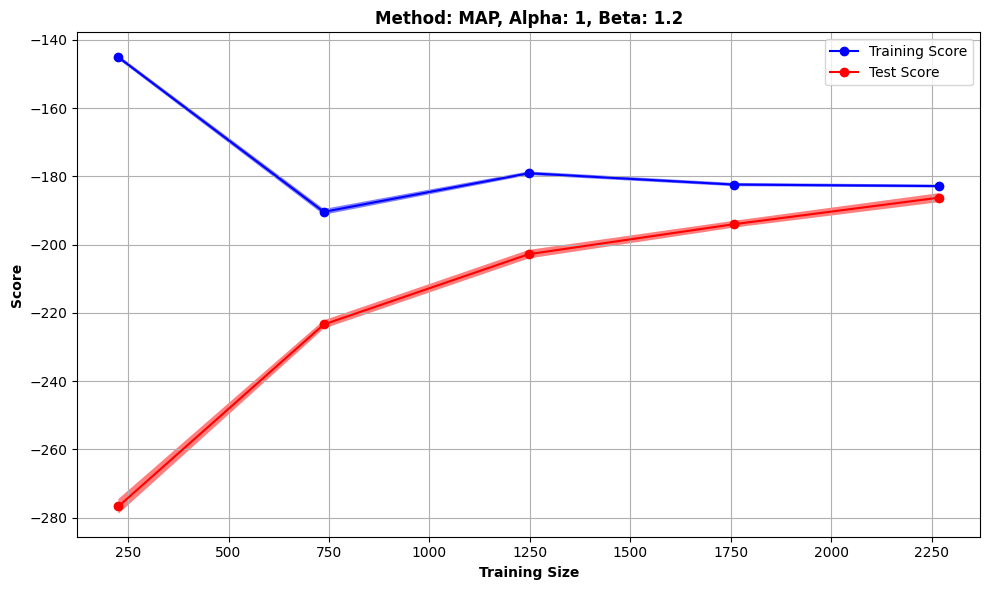

Learning curve for MAP and alpha_class= 0.2 beta= 1.2


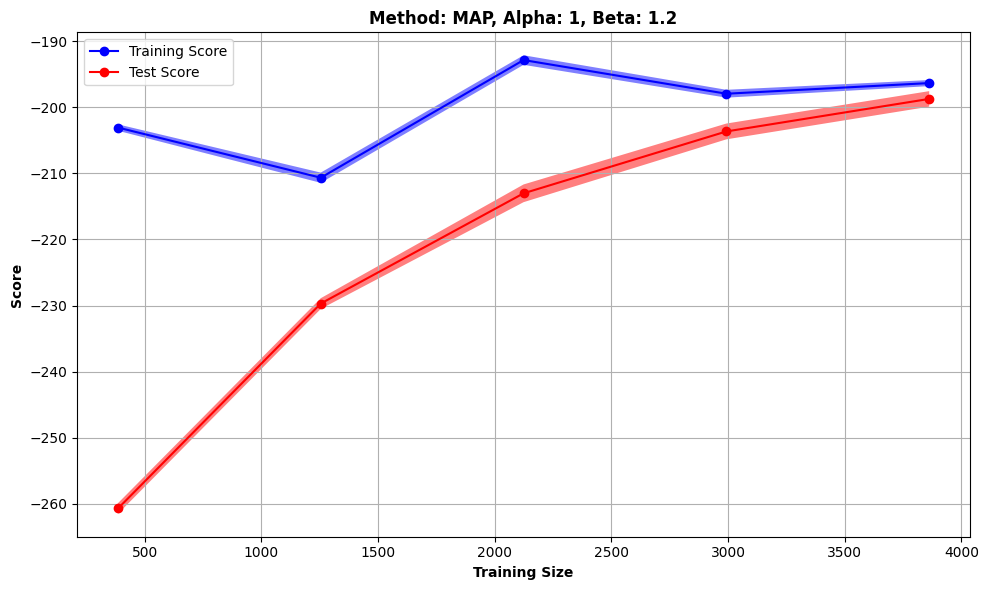

Learning curve for MAP and alpha_class= 0.5 beta= 1.2


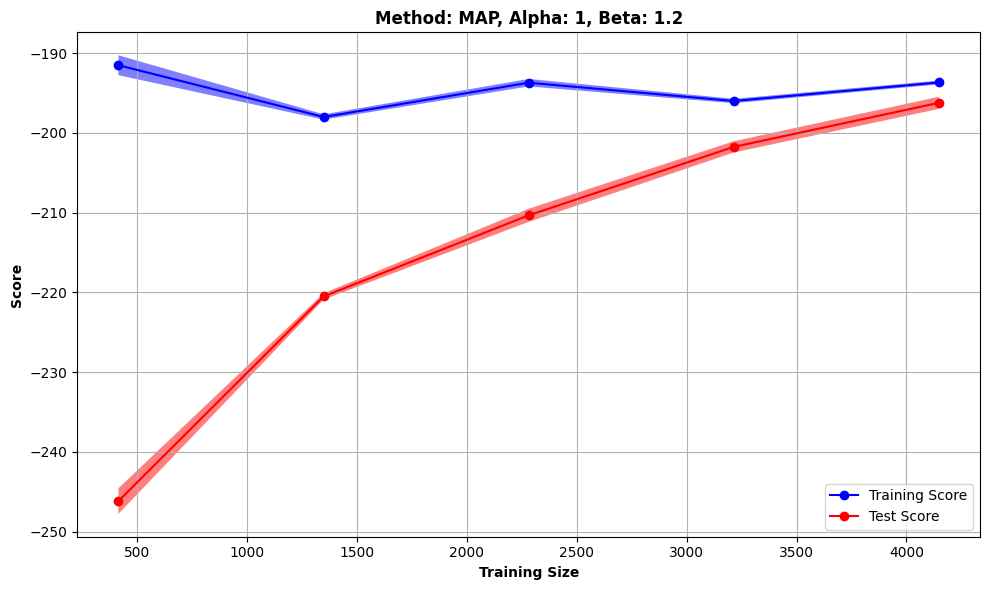

Learning curve for MAP and alpha_class= 1 beta= 1.2


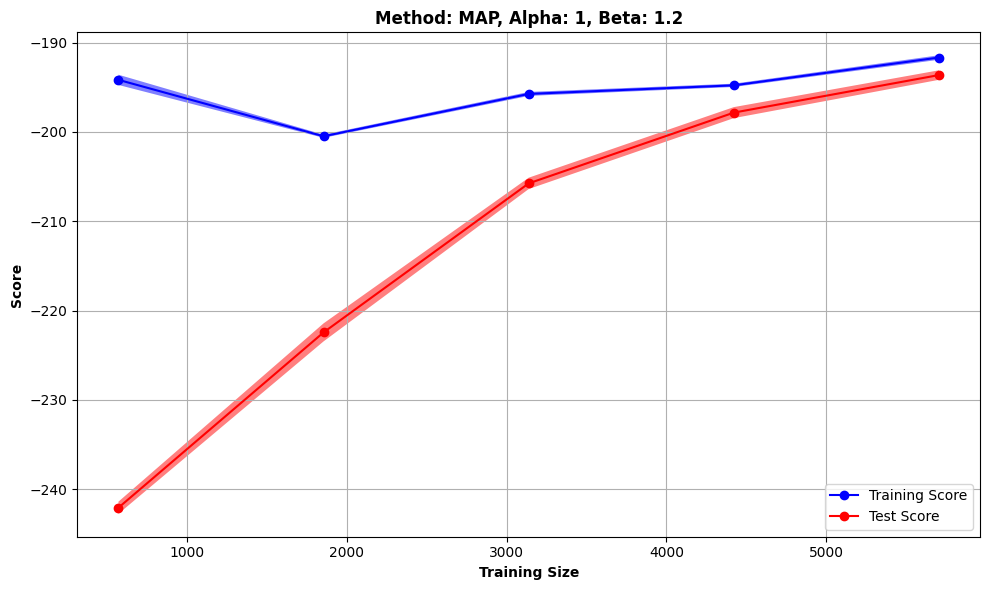

Learning curve for MAP and alpha_class= 10 beta= 1.2


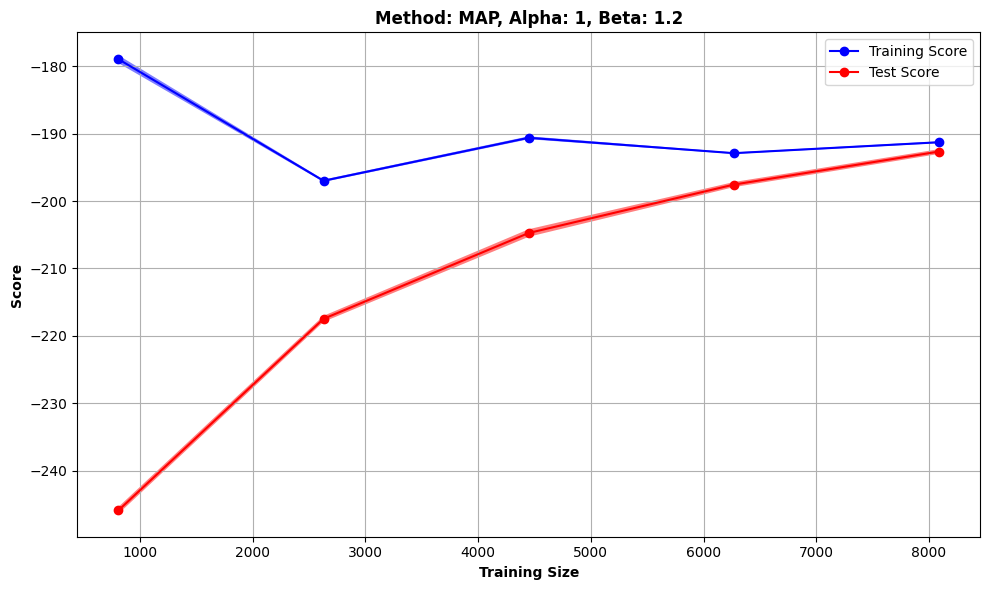

Learning curve for MAP and alpha_class= 100 beta= 1.2


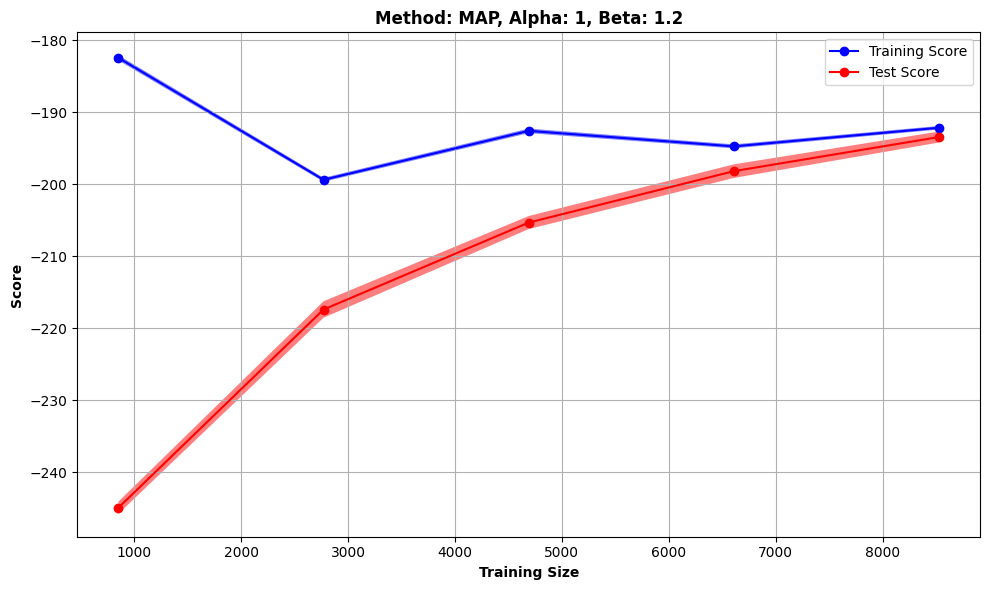

----------------------------------------------
Learning curve for MAP and alpha_class= 0.1 beta= 2


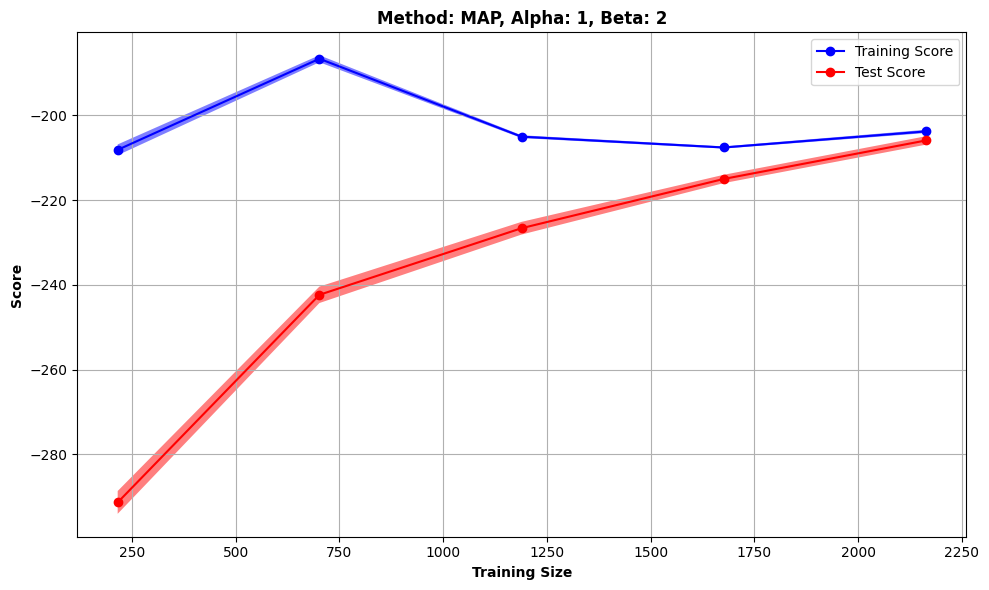

Learning curve for MAP and alpha_class= 0.2 beta= 2


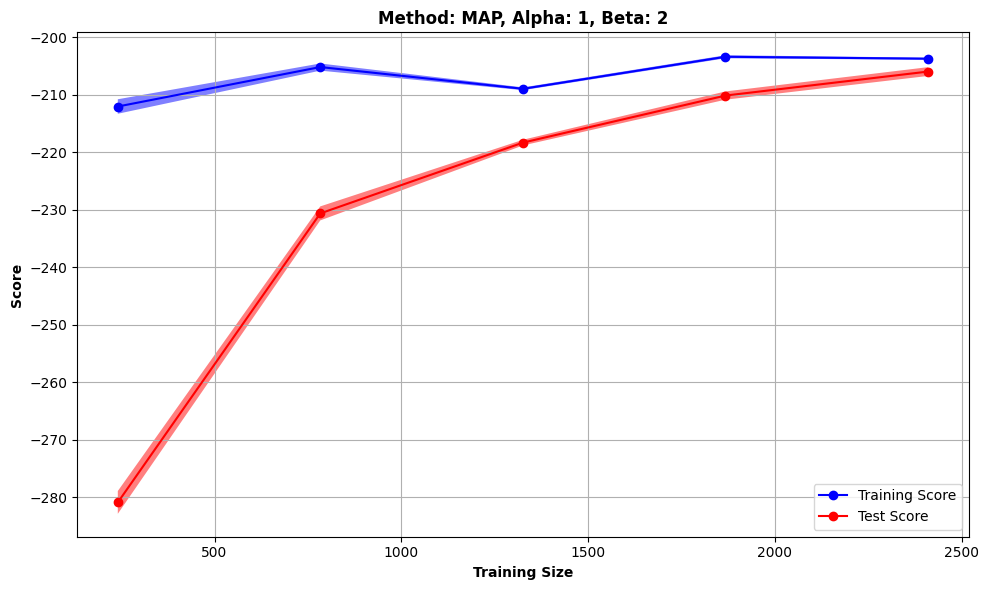

Learning curve for MAP and alpha_class= 0.5 beta= 2


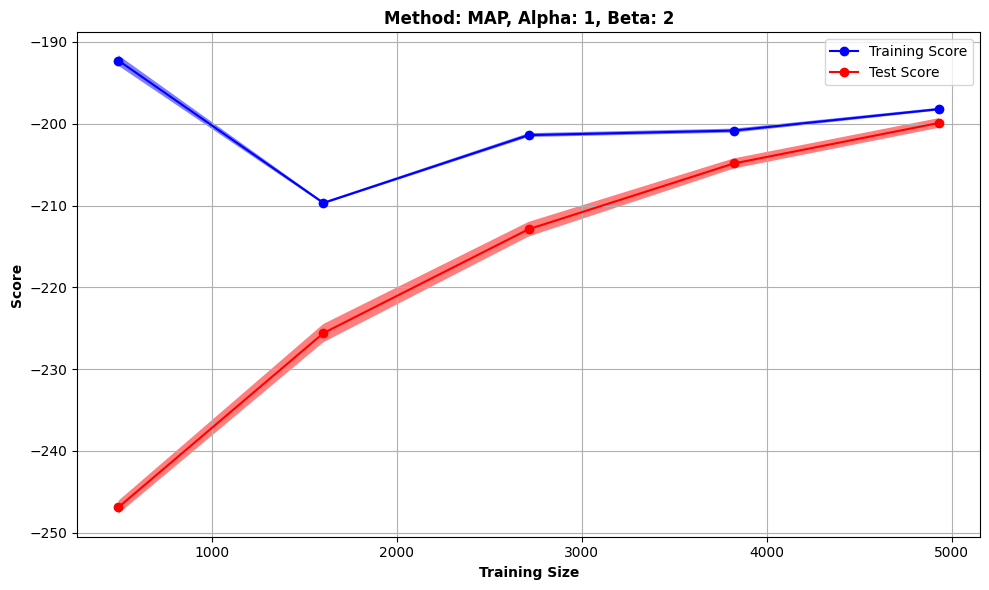

Learning curve for MAP and alpha_class= 1 beta= 2


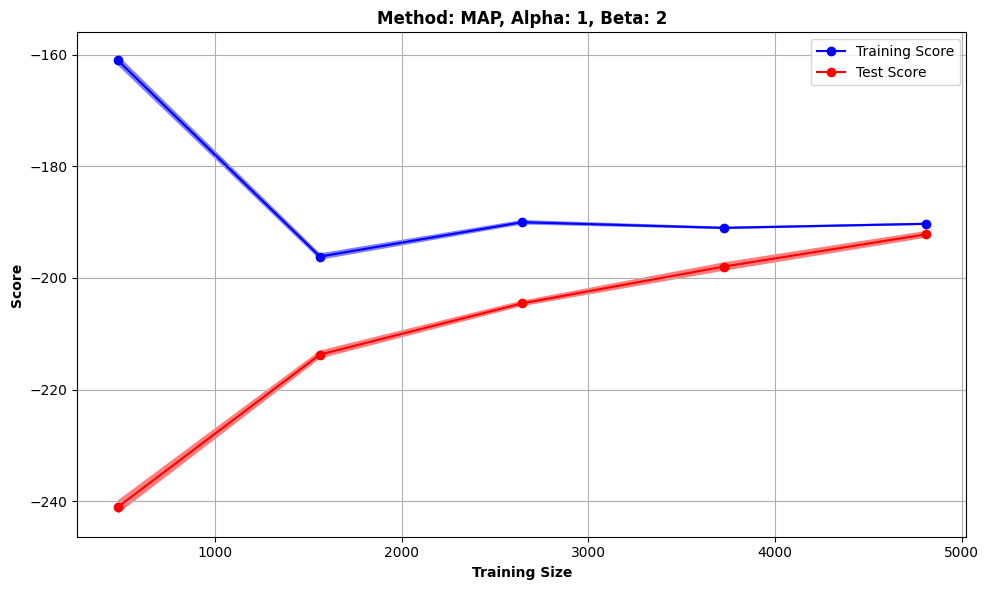

Learning curve for MAP and alpha_class= 10 beta= 2


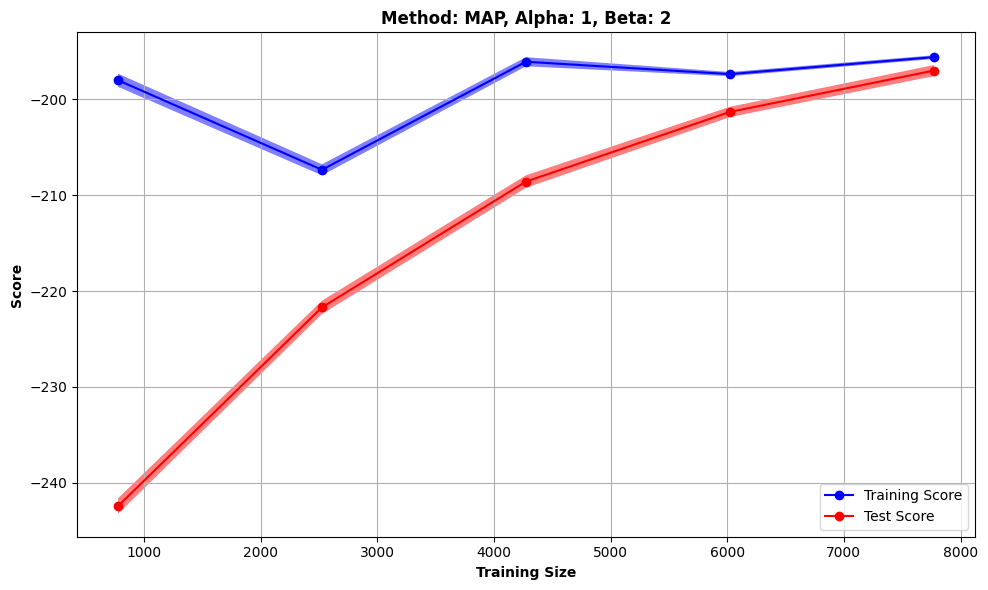

Learning curve for MAP and alpha_class= 100 beta= 2


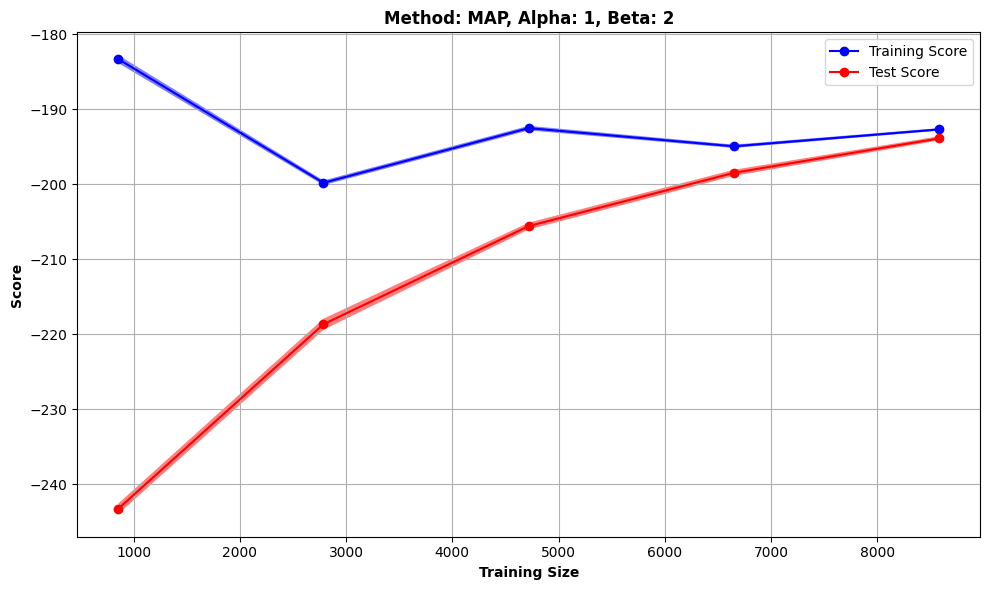

----------------------------------------------
Learning curve for MAP and alpha_class= 0.1 beta= 10


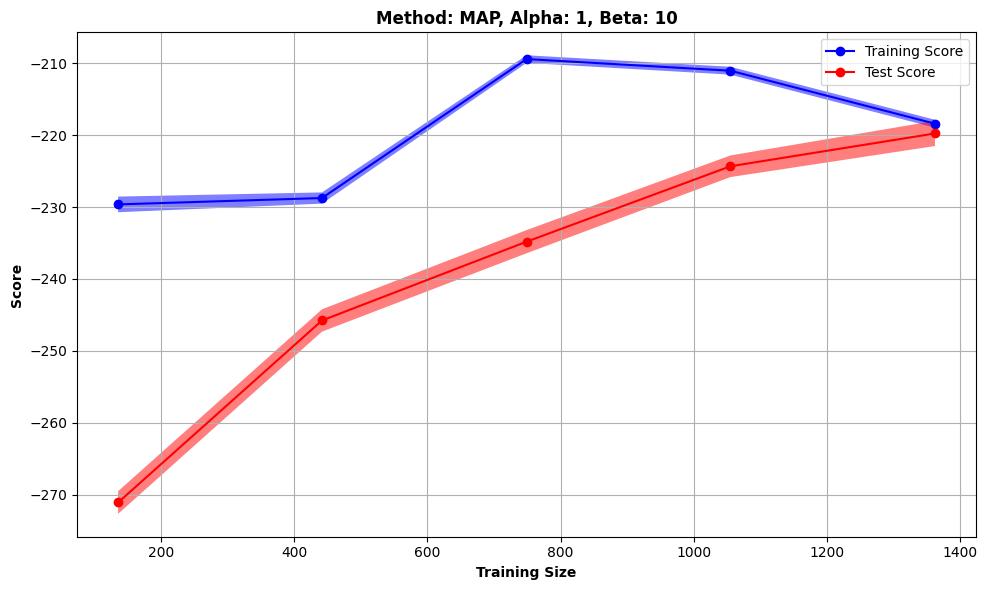

Learning curve for MAP and alpha_class= 0.2 beta= 10


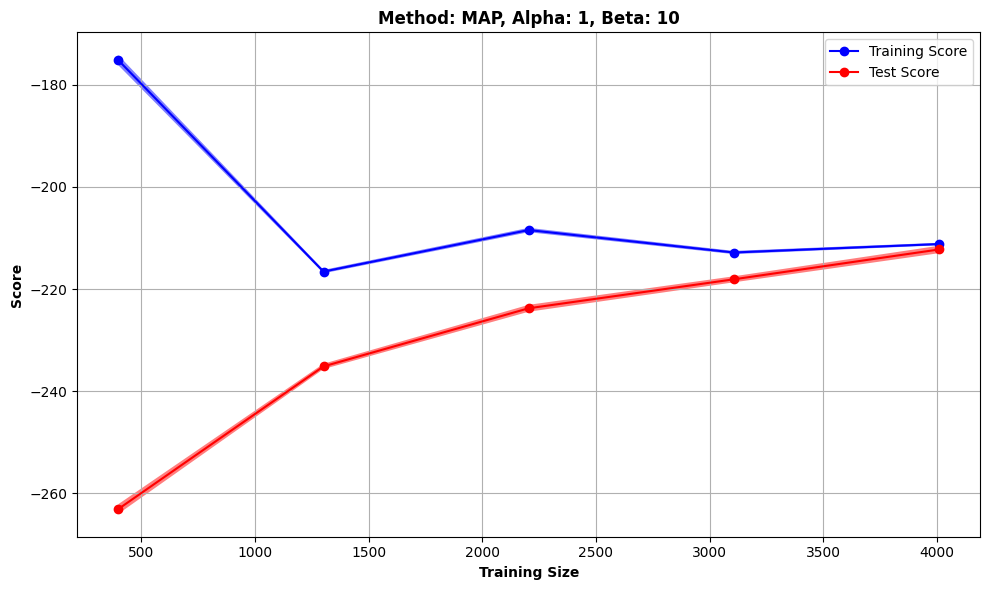

Learning curve for MAP and alpha_class= 0.5 beta= 10


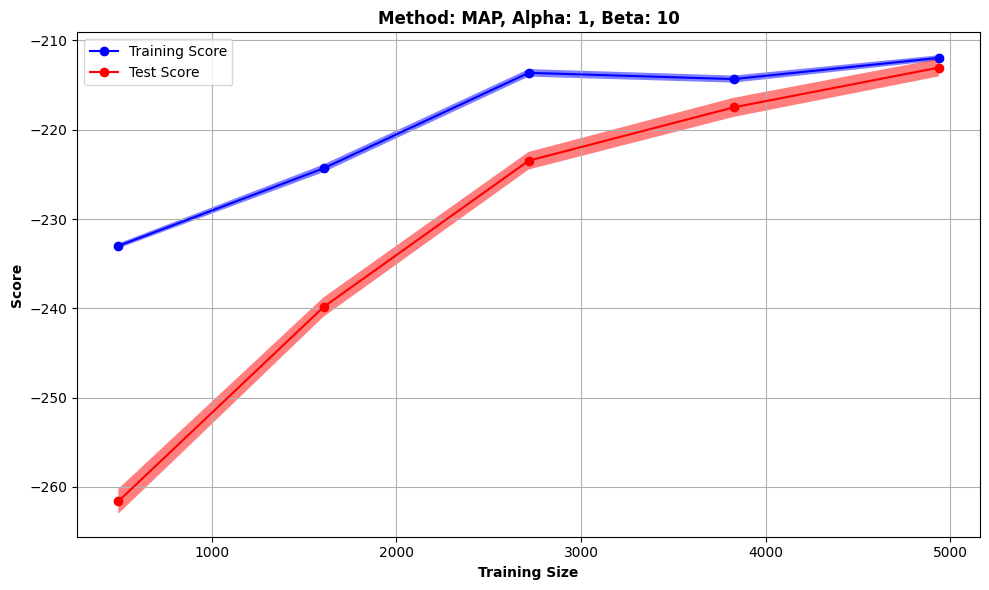

Learning curve for MAP and alpha_class= 1 beta= 10


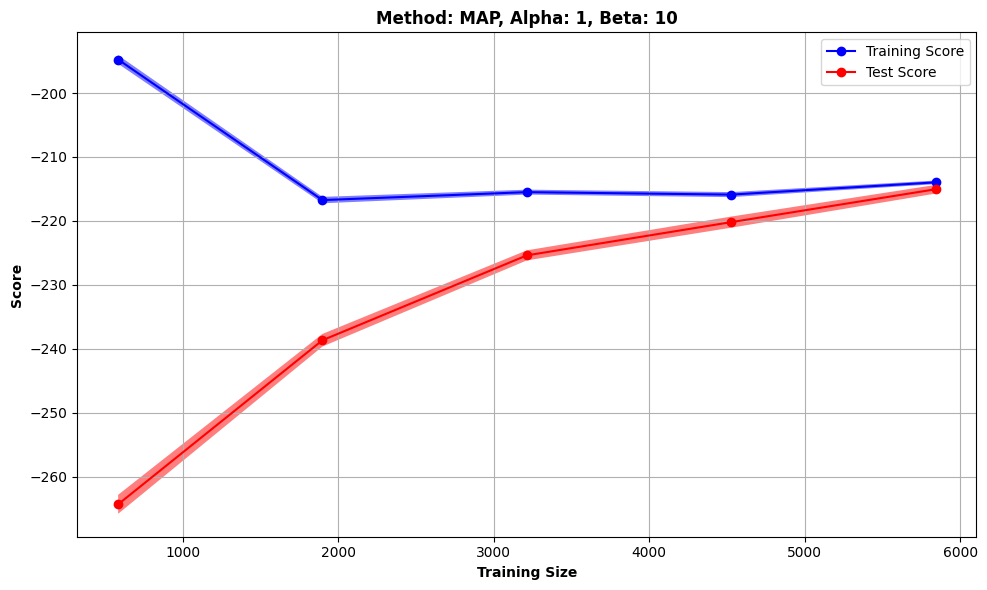

Learning curve for MAP and alpha_class= 10 beta= 10


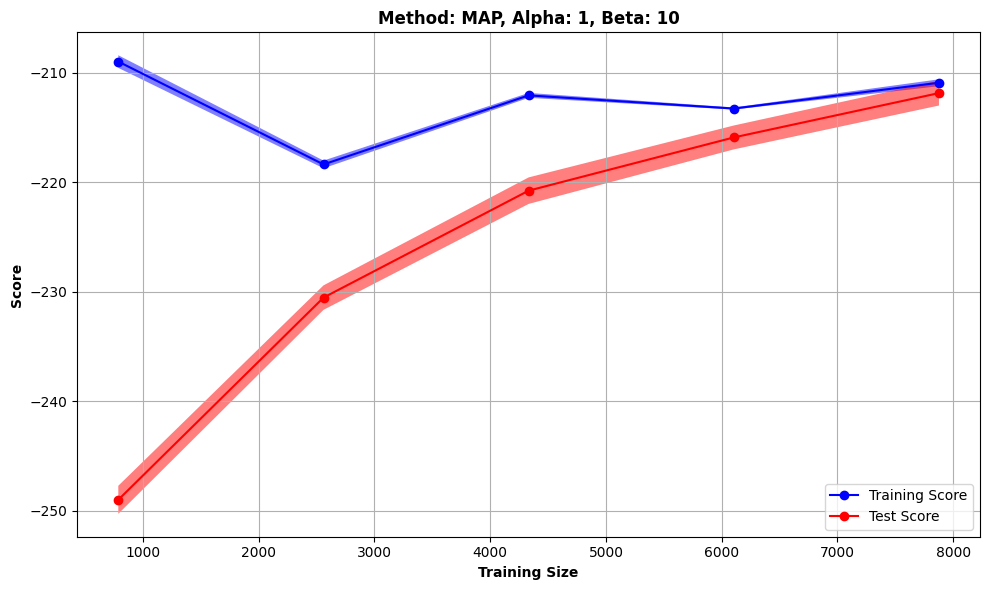

Learning curve for MAP and alpha_class= 100 beta= 10


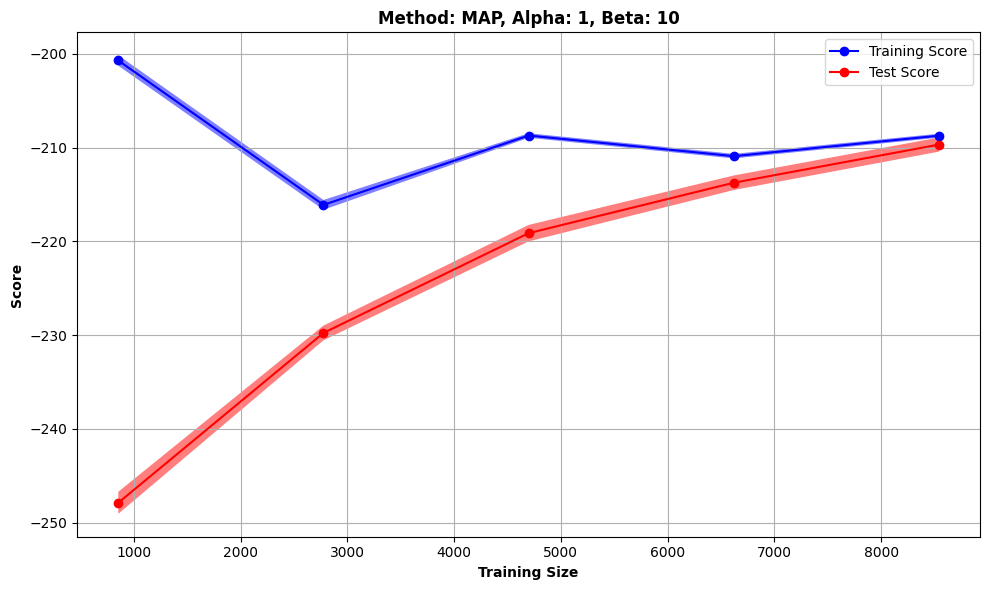

----------------------------------------------
Learning curve for MAP and alpha_class= 0.1 beta= 100


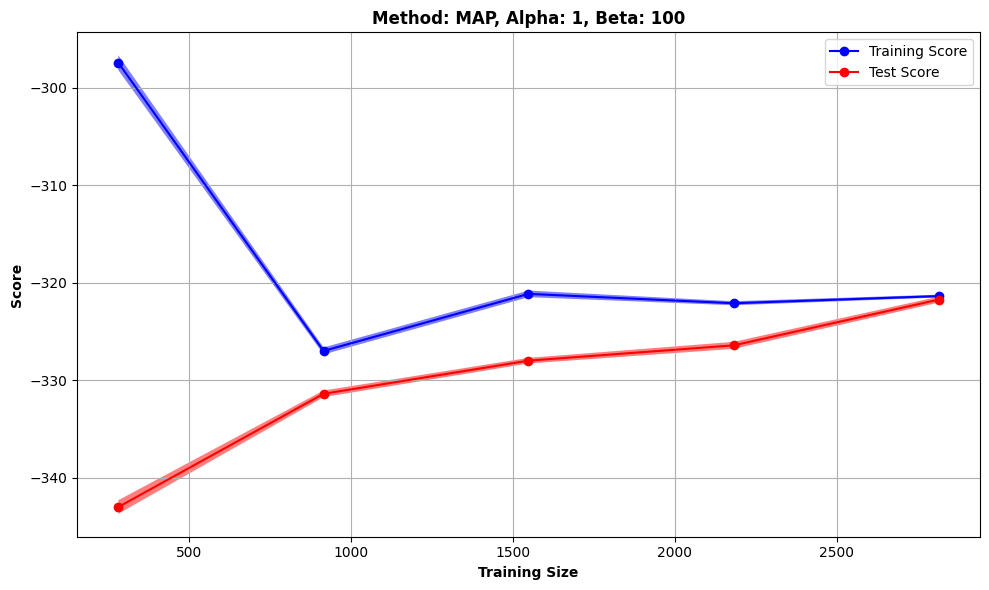

Learning curve for MAP and alpha_class= 0.2 beta= 100


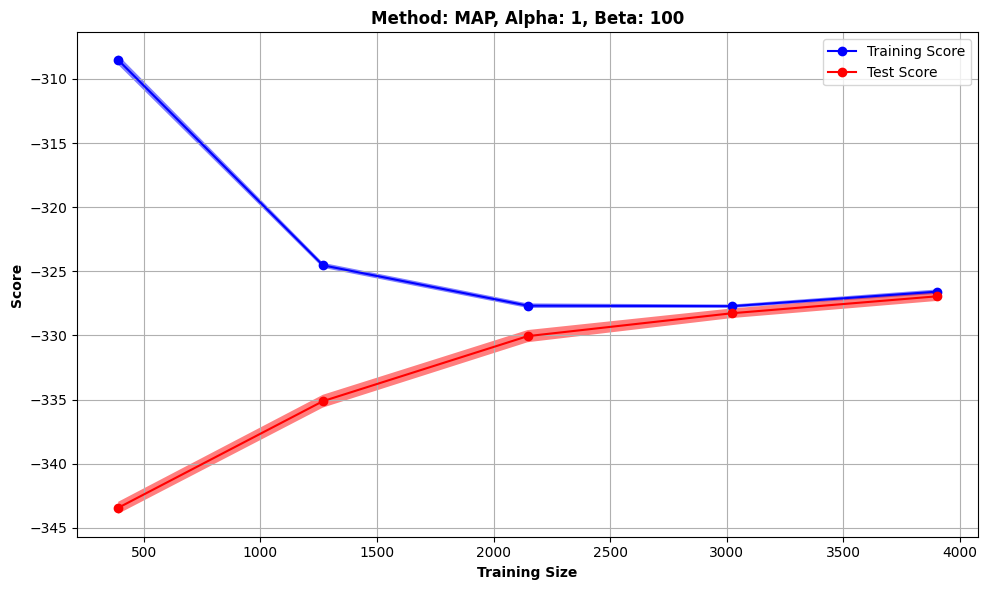

Learning curve for MAP and alpha_class= 0.5 beta= 100


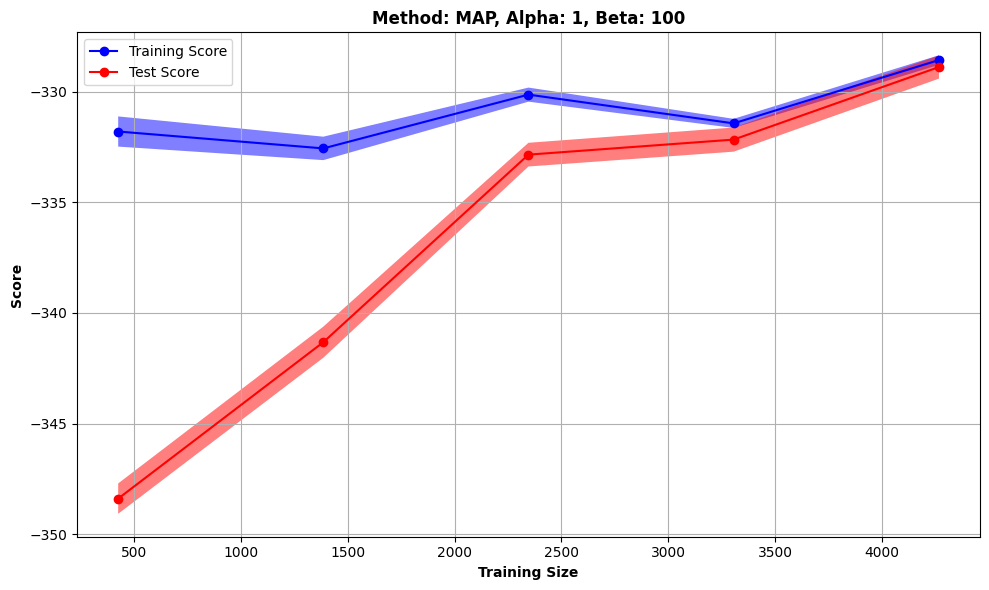

Learning curve for MAP and alpha_class= 1 beta= 100


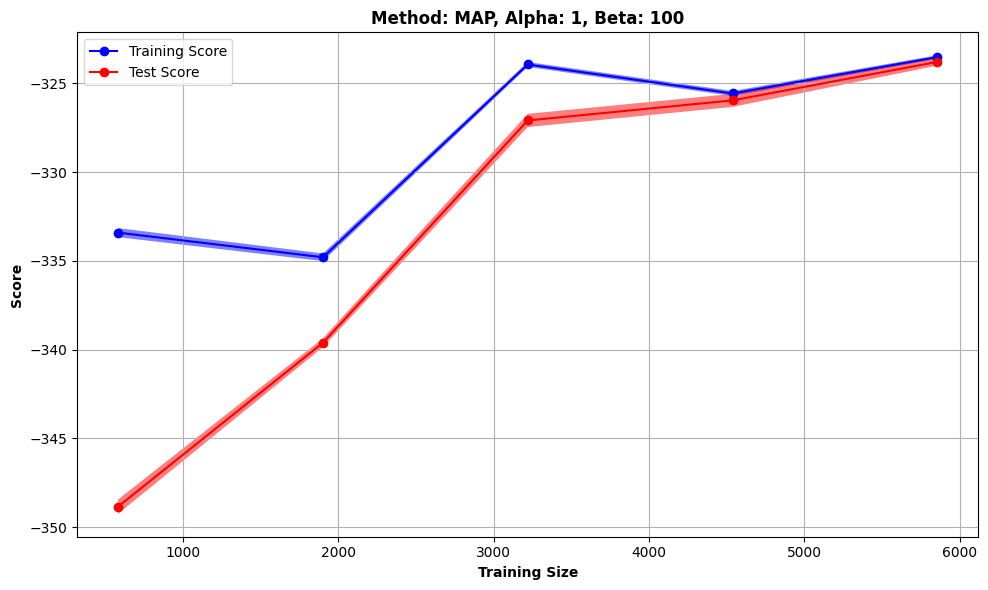

Learning curve for MAP and alpha_class= 10 beta= 100


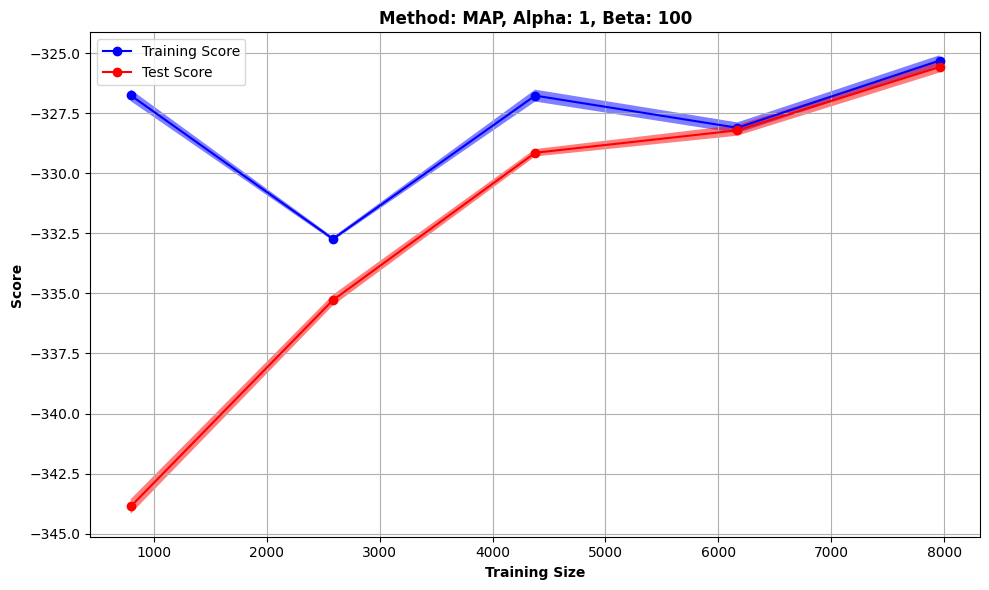

Learning curve for MAP and alpha_class= 100 beta= 100


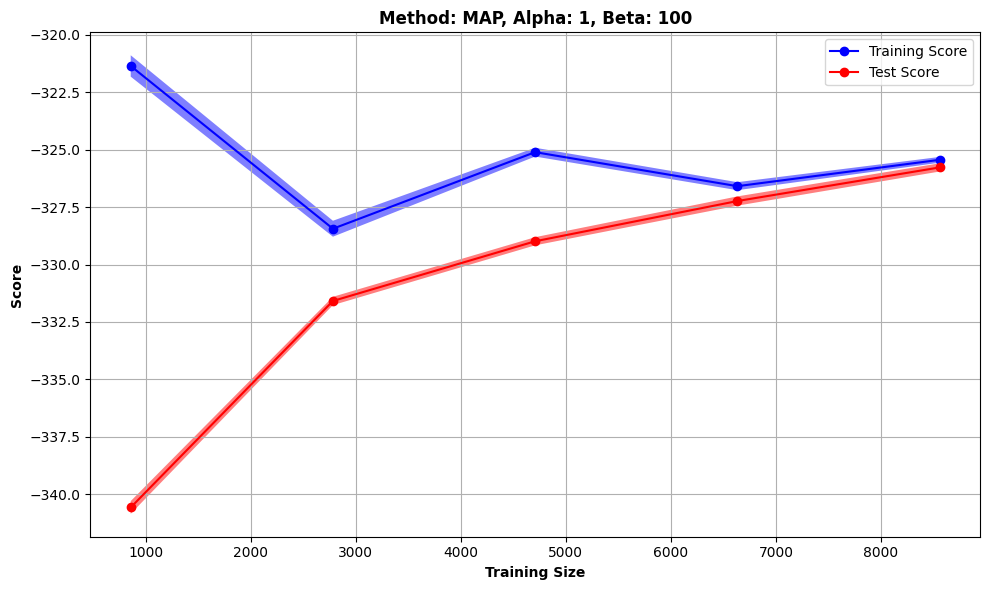

In [12]:
betas = [1.2, 2, 10, 100]

for beta in betas:
    print("----------------------------------------------")
    
    for one_alpha_class in alpha_class:    
        print("Learning curve for MAP and alpha_class=", one_alpha_class, "beta=", beta)   
        X_imbalanced, y_imbalanced = create_imbalanced_dataset(X_train, y_train, one_alpha_class)
        
        try:
            plot_learning_curve("MAP", 1, beta, X_imbalanced, y_imbalanced)
        except Exception as e:
            # Print the reason for the exception but do not display the plot
            print(f"An error occurred: {str(e)}")

### 4.3. Fix the class prior Beta = 1
Set the alpha_class from 0.1 to 100, and alpha from 1 to 100, and beta = 1.

In [ ]:
alphas = [10, 100, 1000]

for alpha in alphas:
    print("----------------------------------------------")
    
    for one_alpha_class in alpha_class:
        print("Learning curve for MAP and alpha_class=", one_alpha_class, "alpha=", alpha)    
        X_imbalanced, y_imbalanced = create_imbalanced_dataset(X_train, y_train, one_alpha_class)
        
        try:
            plot_learning_curve("MAP", alpha, 1, X_imbalanced, y_imbalanced)
        except Exception as e:
            # Print the reason for the exception but do not display the plot
            print(f"An error occurred: {str(e)}")

## 5. Discussion
### 5.1. How does the generalization performance of each model change as a function of the amount of training data and the choice of hyper-parameters?

- **Data Balance and Volume**:
   - Higher `alpha_class` means more balanced, often larger, datasets.
   - As `alpha_class` increases, test scores improve, highlighting the importance of balanced data.

- **MLE**:
   - Generalization improves with increased data balance.
   - No hyperparameters, so its behavior is more predictable and data-driven.

- **MAP**:
   - Increasing `alpha` doesn't impact performance significantly.
   - A rise in `beta` hurts performance, indicating a misalignment with true data distribution.

In essence, balanced data is key for generalization. MLE's performance is largely data-dependent, while MAP's is influenced by its hyperparameters.

### 5.2. Which model would you select for deployment and why?
Absolutely, let's distill it further:
1. **Balanced Data**:
   - **MLE**: Excels with balance.
   - **MAP**: Matches MLE at specific settings, but sensitive to misaligned hyperparameters.
  
2. **Maintenance**:
   - **MLE**: Simple and stable.
   - **MAP**: Flexible but may require tuning.
  
3. **Efficiency**: Consider computational costs for real-time needs.

- For simplicity and stable performance: **MLE**.
For example if I need to do a long-time scale statics, I will choose MLE.
- For flexibility or if MAP shows distinct advantages: **MAP**.
For example if I need to do a short-time scale real-time recommendation model, I will choose MAP.